In [1]:
!pip install wordcloud 
!pip install arabic-reshaper
!pip install python-bidi
!pip install cufflinks

In [2]:
import warnings
warnings.filterwarnings("ignore");

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import sklearn 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raneemalmutairi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raneemalmutairi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df=pd.read_excel("/Users/raneemalmutairi/Desktop/SDAIA/data/Arabic_Tweets.xlsx",index_col=0)
df

Unnamed: 0.1                                               text  \
0              3276  ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä \nŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ htt...   
1               879  @SXANJI ŸÑÿß ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®...   
2              1860  RT @kdzh37: ÿßŸÑŸÅÿ™Ÿâ ÿßŸÑÿ∞Ÿáÿ®Ÿä ‚≠êÔ∏è ŸäÿπŸÑŸÜ ÿßŸÑÿßŸÉÿ™ŸÅÿßÿ° ŸàŸäÿ∂ÿπ...   
3              6342  RT @KSA24: Ÿäÿ≥ÿ£ŸÑŸàŸÜ \nŸÑŸäŸá #ŸÖŸÇÿßÿ∑ÿπÿ©_ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ_ÿßŸÑÿ™ÿ±ŸÉŸä...   
4              4020  RT @Ahmed08911311: ŸäŸàŸÖŸäÿß ÿµŸÅÿ≠Ÿá ŸÖŸÜ ÿßŸÑŸÇÿ±ÿ¢ŸÜ \nŸÉŸÅŸäŸÑ...   
...             ...                                                ...   
29554          1297  RT @nakl3af4: ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂\nŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿß...   
29555          1844  RT @70sul: ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ© ŸÖŸÜ ...   
29556          5389  RT @m_bukairy: ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä #ÿßŸÑÿßŸáŸÑŸä : Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±...   
29557          5307  RT @samialqorashi: ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ Ÿ¢Ÿ§Ÿ§ ŸÖŸÑŸä...   
29558          3137  RT @sh_b_j_a: üõëÿπÿßÿ¨ŸÑüõë\nÿßŸÜÿ®ÿßÿ° ( ÿ∫Ÿäÿ± ) ŸÖÿ§ŸÉÿØÿ© ÿπŸÜ ŸÜ...   

              Username                          location  \
0            Al3hdNews                      ÿßŸÑŸÇÿßŸáÿ±ÿ©, ŸÖÿµÿ±   
1         fekrytarro22                     ÿßŸÑŸÖŸÜŸàŸÅŸäÿ©, ŸÖÿµÿ±   
2              hmde441                               NaN   
3      saefAlJohaniksa         ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©    
4               wabil_                               NaN   
...                ...                               ...   
29554  NourHom91041300                             Syria   
29555      2002__light  ÿßŸÑÿ¨ÿ®ŸäŸÑ, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29556     ALHILALMCLUB                          ÿßŸÑŸáŸÑÿßŸÑ.üíô   
29557        sssss1397      ÿ¨ÿØÿ©  ÿπÿ±Ÿàÿ≥ ÿßŸÑŸÉŸàŸÜ  JEDDAH  ‚Å¶‚Å¶‚Å¶   
29558    N909017720748                               NaN   

                            Timestamp  followers  label categorie  
0      Sat Oct 10 19:41:00 +0000 2020          4      0     sport  
1      Thu Oct 08 20:10:28 +0000 2020        365      0     sport  
2      Fri Oct 09 20:55:46 +0000 2020       1663      0     sport  
3      Tue Oct 13 01:38:17 +0000 2020        443      4   economy  
4      Sat Oct 10 21:27:14 +0000 2020       5873      2  religion  
...                               ...        ...    ...       ...  
29554  Fri Oct 09 16:40:36 +0000 2020        477      4   economy  
29555  Fri Oct 09 21:35:06 +0000 2020        316      1   politic  
29556  Mon Oct 12 16:48:16 +0000 2020         38      0     sport  
29557  Mon Oct 12 16:45:32 +0000 2020       3621      0     sport  
29558  Fri Oct 09 22:02:24 +0000 2020         28      1   politic  

[29559 rows x 8 columns]

In [4]:
df.shape

(29559, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29559 entries, 0 to 29558
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  29559 non-null  int64 
 1   text          29559 non-null  object
 2   Username      29559 non-null  object
 3   location      14180 non-null  object
 4   Timestamp     29559 non-null  object
 5   followers     29559 non-null  int64 
 6   label         29559 non-null  int64 
 7   categorie     29559 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
df=df.dropna()
df

Unnamed: 0.1                                               text  \
0              3276  ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä \nŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ htt...   
1               879  @SXANJI ŸÑÿß ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®...   
3              6342  RT @KSA24: Ÿäÿ≥ÿ£ŸÑŸàŸÜ \nŸÑŸäŸá #ŸÖŸÇÿßÿ∑ÿπÿ©_ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ_ÿßŸÑÿ™ÿ±ŸÉŸä...   
5              1037  ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ± ŸÖŸÜ ÿßŸÖÿ´ÿßŸÑŸáŸÖ‚ù§Ô∏è http...   
6              5910  RT @City_Line6: * 17 ŸÖŸÑŸäŸàŸÜ Ÿà400 ÿßŸÑŸÅ ŸÉŸÑ ŸÖÿ¨ŸÖŸàÿπ ÿß...   
...             ...                                                ...   
29553          1380  RT @Musaid_AlSohimi: ŸÑÿ≥ÿ™Ÿè ŸÜÿµÿ±ÿßŸàŸäÿßŸã .. \nŸàŸÑÿß ÿ™Ÿá...   
29554          1297  RT @nakl3af4: ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂\nŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿß...   
29555          1844  RT @70sul: ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ© ŸÖŸÜ ...   
29556          5389  RT @m_bukairy: ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä #ÿßŸÑÿßŸáŸÑŸä : Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±...   
29557          5307  RT @samialqorashi: ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ Ÿ¢Ÿ§Ÿ§ ŸÖŸÑŸä...   

              Username                          location  \
0            Al3hdNews                      ÿßŸÑŸÇÿßŸáÿ±ÿ©, ŸÖÿµÿ±   
1         fekrytarro22                     ÿßŸÑŸÖŸÜŸàŸÅŸäÿ©, ŸÖÿµÿ±   
3      saefAlJohaniksa         ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©    
5         LulwaBuhazaa                           Bahrain   
6         Mishal_mut3b          ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
...                ...                               ...   
29553        sjsallam2     ÿ¨ÿØÿ©, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29554  NourHom91041300                             Syria   
29555      2002__light  ÿßŸÑÿ¨ÿ®ŸäŸÑ, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29556     ALHILALMCLUB                          ÿßŸÑŸáŸÑÿßŸÑ.üíô   
29557        sssss1397      ÿ¨ÿØÿ©  ÿπÿ±Ÿàÿ≥ ÿßŸÑŸÉŸàŸÜ  JEDDAH  ‚Å¶‚Å¶‚Å¶   

                            Timestamp  followers  label categorie  
0      Sat Oct 10 19:41:00 +0000 2020          4      0     sport  
1      Thu Oct 08 20:10:28 +0000 2020        365      0     sport  
3      Tue Oct 13 01:38:17 +0000 2020        443      4   economy  
5      Fri Oct 09 22:20:56 +0000 2020        884      2  religion  
6      Mon Oct 12 17:05:09 +0000 2020        908      0     sport  
...                               ...        ...    ...       ...  
29553  Fri Oct 09 20:45:44 +0000 2020      20530      0     sport  
29554  Fri Oct 09 16:40:36 +0000 2020        477      4   economy  
29555  Fri Oct 09 21:35:06 +0000 2020        316      1   politic  
29556  Mon Oct 12 16:48:16 +0000 2020         38      0     sport  
29557  Mon Oct 12 16:45:32 +0000 2020       3621      0     sport  

[14180 rows x 8 columns]

In [7]:
df.isna().sum()

Unnamed: 0.1    0
text            0
Username        0
location        0
Timestamp       0
followers       0
label           0
categorie       0
dtype: int64

#Preprocessing

In [8]:
mystop = ['ŸÖÿ´ŸÑÿß', 'ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá', 'ÿßŸÑÿ≥ŸÜŸá', 'ÿµŸàÿ™', 'ÿ®Ÿà', 'ÿ™ÿ¥ŸàŸÅ',
 'ŸÖŸàÿ∂Ÿàÿπ', 'ŸÅÿ™ÿ±Ÿá', 'ÿ®ÿπŸäÿØ', 'ÿßŸÑÿµŸàÿ±Ÿá', 'ÿßÿ®ÿØÿß', 'ÿßŸÑÿ≠ÿ®', 'ÿßŸÑÿ≠ŸÖÿØ', 'ŸÖÿπÿßŸáŸÖ', 'ŸÇŸÑÿ®ŸÉ', 'ŸàÿßŸÜÿ™Ÿä', 'ŸÑÿ≠ÿØ', 'Ÿàÿßÿ≠ŸÜÿß', 'ÿπŸÖÿ±ŸÉ',
 'ÿßŸÑÿ≠ŸäÿßŸá', 'ÿßŸÖŸäŸÜ', 'ÿßÿ®ŸÜ', 'ÿßÿÆŸàŸä', 'ŸÖŸÜŸä', 'ÿßÿ≥ŸÖŸá', 'ŸäÿßÿÆŸä', 'ÿ®ÿßŸÇŸä', 'ÿßŸÜÿ™Ÿàÿß', 'ÿ≠ÿ®', 'ÿπŸÜÿØŸÉŸÖ', 'ÿ¥ÿ∫ŸÑ', 'ŸÉŸÑÿßŸÖŸÉ', 'Ÿäÿ≥ÿπÿØ', 'ÿ™ÿ®Ÿä',
 'ŸÖÿ®ÿ±ŸàŸÉ', 'ÿ∑ŸÑÿπÿ™', 'ÿ¥ŸÑŸàŸÜ', 'ÿ™ÿπÿ±ŸÅ', 'ŸÉÿ´ÿ±', 'ÿ®ŸÑÿß', 'Ÿàÿ®ÿπÿØŸäŸÜ', 'ÿπÿßŸÖ', 'ÿπŸäÿ®', 'ÿ±ŸÖÿ∂ÿßŸÜ', 'ÿßŸÑÿ®Ÿäÿ™', 'ŸÜÿµ', 'ÿ¨ÿØŸäÿØ',
 'ÿ´ÿßŸÜŸä', 'ÿπÿßÿ±ŸÅŸá', 'ŸÅŸÑŸàÿ≥', 'ÿßŸÑÿµÿ®ÿ≠', 'ÿßŸÑÿßŸàŸÑ', 'ÿ¥Ÿäÿ°', 'ÿµŸàÿ±Ÿá', 'ŸÅŸÇÿ∑', 'ŸàŸÅŸä', 'ÿ¨ÿßŸä', 'ÿ¨ŸÖÿßÿπŸá', 'ÿ®ŸÜ', 'ÿÆŸÑÿµ', 'ŸàÿßŸÜ', 'ÿ¥ÿπÿ®',
 'Ÿàÿßÿ∂ÿ≠', 'ÿ™ÿ≠ÿ™', 'ÿ∑ÿ®', 'ŸäŸÑÿß', 'Ÿàÿßÿ∞ÿß', 'ÿµÿßÿ±ÿ™', 'ÿπŸÜŸá', 'ÿ∂ÿØ', 'ŸÖÿßÿ¥Ÿä', 'ŸÑÿ≥Ÿá', 'Ÿäÿ®Ÿä', 'ÿ®ÿÆŸäÿ±', 'ÿ±Ÿàÿ≠',
 'ÿ≠ÿ®Ÿäÿ®Ÿä', 'ÿ≥ŸÜŸäŸÜ', 'ŸÉÿ´Ÿäÿ±', 'ÿ≤ŸäŸÜ', 'ÿ¥ŸàŸÅ', 'ÿØÿßŸäŸÖÿß', 'ÿ®ŸÉÿ±Ÿá', 'Ÿäÿ¨Ÿä', 'ŸÉŸÑŸÜÿß', 'ÿßŸÑŸàŸÇÿ™', 'Ÿäÿ®ÿßÿ±ŸÉ', 'ÿßŸáŸÖ', 'ŸÖÿπÿßŸá', 'ŸÖÿ¥ŸÉŸÑŸá',
 'ÿßŸÑŸÉŸàŸäÿ™', 'ÿßÿ¥ŸàŸÅ', 'ŸÅŸÉÿ±Ÿá', 'ŸÑŸäŸÜ', 'ÿßŸÜŸáŸÖ', 'ŸÖŸÉÿßŸÜ', 'ÿ≠ÿ±ÿßŸÖ', 'ŸÑŸÑŸá', 'Ÿäÿ∑ŸÑÿπ', 'ÿßÿπÿ±ŸÅ', 'ÿßŸÅÿ∂ŸÑ', 'ÿµÿ≠Ÿäÿ≠', 'ŸÅŸàŸÇ', 'ÿ™ÿ±Ÿâ',
 'ÿßŸá', 'ÿ®ÿπÿØŸäŸÜ', 'ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂', 'ŸÉÿ®Ÿäÿ±','ÿ¥ŸÉÿ±ÿß', 'ÿ™ÿßŸÜŸä','ÿßŸäŸá','ÿßÿ≠ŸÜÿß','ŸàŸäŸÜ','ŸÑŸäÿ¥','ÿ¥Ÿà','ÿßŸÑÿß', 'ÿ¥ŸÅÿ™', 'ÿ∫ŸÑÿ∑', 'ŸÑŸÑÿßÿ≥ŸÅ', 'ÿ™ŸàŸäÿ™ÿ±',
 'ŸÜŸÅÿ≥ŸÉ', 'ÿ≥ÿßÿπŸá', 'ŸÖÿπŸÉ', 'ÿßŸÑÿ®ŸÑÿØ', 'ÿ®ŸÜÿ™', 'ŸÖÿ≠ÿØ','ÿßŸáŸÑ', 'ŸÖÿπÿßŸÉ', 'ŸÜŸÅÿ≥Ÿá', 'ÿßÿ¥Ÿä', 'ÿßŸäÿ¥', 'ÿßŸÑŸÖŸáŸÖ', 'ÿ®ŸÇŸâ', 'ÿßŸÜÿ™Ÿà', 'ŸÖÿßŸÅŸä', 'ŸÖŸÜŸà',
 'ÿπÿßÿØ', 'ŸÉŸÑŸÖŸá', 'ÿßŸÉÿ®ÿ±', 'ŸÉŸÑŸáŸÖ', 'ŸàÿßŸÑÿß', 'ŸÜŸÅÿ≥Ÿä', 'ÿßŸÑŸÖÿ¥ŸÉŸÑŸá', 'ÿßŸÇŸàŸÑ', 'ÿßŸäÿßŸÖ', 'ŸÇÿßÿπÿØ', 'ŸäŸÑŸä', 'ÿ≤ŸÖÿßŸÜ', 'ÿßŸÑŸÉŸÑ', 'ÿßŸÜŸáÿß', 'ŸÖÿ≠ŸÖÿØ',
 'ÿßŸÖ', 'ÿ∑ŸÑÿπ', 'ÿ®ŸÉŸÑ', 'ÿ¥ŸàŸäŸá', 'ÿ™ŸÇŸàŸÑ', 'ÿπŸÑŸäŸÉŸÖ', 'ÿßŸÑŸàÿßÿ≠ÿØ', 'ÿµÿ®ÿßÿ≠', 'ŸÇŸÑÿ™', 'ÿÆŸÑÿßÿµ', 'ŸäÿµŸäÿ±', 'ÿßŸÑŸÖŸàÿ∂Ÿàÿπ', 'ÿπŸÜÿØŸáŸÖ', 'ÿßŸÑÿπÿßŸÑŸÖ',
 'ÿßŸÑÿØŸÜŸäÿß', 'ÿßŸÑÿ¥ÿπÿ®', 'ÿ∑ÿ®ÿπÿß', 'ÿ∑ŸàŸÑ', 'ÿ±ÿ®', 'ÿßŸÑÿÆŸäÿ±', 'ÿßŸÖÿß', 'ÿ≠ŸÑŸà', 'ŸÅÿπŸÑÿß', 'ŸÖÿ®', 'ÿ¥ŸàŸä', 'ÿßÿ≠ÿØ', 'ŸàŸÉŸÑ', 'ŸàŸÇÿ™', 'ŸÅŸäŸáŸÖ', 'ŸÖŸÜŸÉ',
 'ÿ¥ÿÆÿµ', 'ŸÇŸÑÿ®Ÿä', 'ÿßŸÑŸÉŸÑÿßŸÖ', 'ÿπÿßÿ±ŸÅ', 'ŸÖŸÜŸáŸÖ', 'ÿßÿÆÿ±', 'ŸÉŸÑŸáÿß', 'ŸáÿßŸä', 'ÿ≠ŸÑŸàŸá', 'ÿßŸÉÿ™ÿ±', 'ŸäŸÖŸÉŸÜ', 'ÿ™ŸÉŸàŸÜ', 'ŸÑÿßŸÜŸá', 'ŸàÿßŸÑŸÑŸä', 'ŸÉŸÑÿßŸÖ',
 'ÿßŸÑÿ≠ŸäŸÜ', 'ÿßÿ≠ŸÑŸâ', 'ÿπŸÑÿ¥ÿßŸÜ', 'ÿπŸÜÿØŸÜÿß', 'ÿ®ÿßŸÑŸÑŸá', 'ÿßŸÑŸÅ', 'ÿπŸÜÿØŸÉ', 'ÿßÿ≠ÿ≥ŸÜ', 'ŸÇÿ∑ÿ±', 'Ÿàÿ≠ÿØŸá', 'ÿπŸÑŸäŸÜÿß', 'ÿ®ÿØŸàŸÜ', 'ÿπŸÜÿØŸá', 'ŸäŸÇŸàŸÑ', 'ÿπÿßÿØŸä',
 'ŸÉŸÑŸá', 'ÿπŸÑŸäŸáÿß', 'ÿØÿß', 'ÿ≠ŸÇ', 'ÿßÿ®Ÿà', 'ÿπŸÑŸäŸáŸÖ', 'ÿßÿµŸÑÿß', 'ŸÅŸäŸÉ', 'ŸÖÿµÿ±', 'ÿßŸÉŸäÿØ', 'ÿßŸÑŸÑŸâ', 'ŸÉÿ™Ÿäÿ±', 'ÿ±ÿ≠', 'ÿ±ÿ®ŸÜÿß', 'ŸÉŸÖÿßŸÜ',
 'ŸÑŸäŸá', 'ŸÑÿßŸÜ', 'ÿßŸÉÿ´ÿ±', 'ÿßŸÑ', 'ŸàÿßŸÜÿ™', 'ÿßŸÜÿ™Ÿä', 'ÿ∑Ÿäÿ®','ÿ≥ŸÜŸá', 'ŸÉÿØŸá', 'ŸÜŸÅÿ≥', 'ÿπŸÜÿØŸä', 'ŸáŸäŸÉ','ÿÆŸäÿ±','ÿµÿ≠','ŸÖŸäŸÜ','ÿ¥ÿßÿ°','ŸÖÿ´ŸÑ',
 'ÿßŸÜŸà','ÿ≤Ÿä','ÿµÿßÿ±','ÿßŸÜŸÉ','ÿπŸÖ','ÿ±ÿ®Ÿä','Ÿäÿßÿ±ÿ®','ÿ≠ÿßÿ¨Ÿá','ŸÉŸÜÿ™','ÿßŸÑŸäŸàŸÖ','ÿßŸÜŸä','ÿßŸàŸÑ','ŸÖŸÖŸÉŸÜ','ŸÖÿ±Ÿá','ÿØŸä','ŸàÿßŸÜÿß','ŸÜÿßÿ≥','ÿ±ÿßÿ≠','ÿ≠ÿØ',
 'ŸÑÿßÿ≤ŸÖ','ŸäŸàŸÖ','ÿØŸá','ŸÖŸà','ÿπŸÑŸä','Ÿàÿßÿ≠ÿØ','ÿßŸä','ÿßŸÑŸÜÿßÿ≥','ŸäÿπŸÜŸä','ÿπÿ¥ÿßŸÜ','ÿßÿ∞ÿß','ÿßŸÜÿ™','ÿ¥Ÿä','ŸáŸá','ŸàÿßŸÑŸÑŸá','ŸÖÿ¥','ÿßŸÜÿß','ÿßŸÑŸÑŸá','ÿßŸÑŸÑŸä',
 'ÿßŸÑÿ¨ÿØŸäÿØ', 'ÿπÿßŸÑŸÖ', 'ÿ∑ÿ±ŸäŸÇŸá', 'ÿ™ŸàŸÜÿ≥', 'ŸÉŸÅÿßŸäŸá', 'ÿßÿ±ÿ¨ÿπ', 'ÿßŸÑÿ™ÿ∫ÿ±ŸäÿØŸá', 'ÿßŸÑÿßÿÆÿ±', 'ÿßŸÑÿ≥ÿ®ÿ®', 'ÿ≠ÿ≥ŸÜ', 'ÿµÿπÿ®Ÿá', 'ÿ±ÿßÿ≥ŸÉ', 'ÿ™ÿ≠ŸÉŸä', 'ÿπÿ®ÿØ', 'ŸÑŸÖŸÜ', 'ÿπŸÜŸä',
 'ŸàÿßŸÑŸÜÿßÿ≥', 'ÿπŸäŸàŸÜŸÉ', 'ŸÑŸÑŸÜÿßÿ≥', 'ÿßŸÑÿµÿ±ÿßÿ≠Ÿá', 'ÿØÿßÿÆŸÑ', 'ÿßŸÑÿßŸÖÿßÿ±ÿßÿ™', 'ÿ±ŸÇŸÖ', 'ÿßŸÑÿπÿßŸÖ', 'ÿßŸÖÿ±ŸäŸÉÿß', 'ÿ≠ÿµŸÑ', 'ÿÆÿßŸäŸÅ', 'ŸÑÿ®ŸÜÿßŸÜ', 'Ÿäÿ™ŸÉŸÑŸÖ', 'ŸÅÿ±ŸÇ', 'ÿ∫ÿ±Ÿäÿ®',
 'ÿßŸÑÿπÿ±ÿ®ŸäŸá', 'ŸÖÿßÿ¥ÿßÿ°', 'ÿ±ÿ∫ŸÖ', 'ÿπŸÑÿßŸÇŸá', 'Ÿäÿ±ÿ≠ŸÖŸá', 'ÿßŸÑŸáŸÑÿßŸÑ', 'ÿÆŸÑŸÉ', 'ŸÅŸäÿØŸäŸà', 'ŸÖÿ®ÿßÿ±ŸÉ', 'ŸÖŸàÿ¨ŸàÿØŸá', 'ÿ≥ÿßÿπÿßÿ™', 'ÿßŸÜÿ™Ÿá', 'ŸÑŸäŸÜÿß', 'ÿßŸÑŸÖÿ®ÿßÿ±ÿßŸá', 'ŸÖÿßŸÅŸäŸá', 'ŸÖÿßÿ±ÿßÿ≠',
 'ÿ¥ÿπŸàÿ±', 'ÿ™ÿ±ÿ¨ÿπ', 'ŸÑŸÑÿ≠ŸäŸÜ', 'ÿ®ÿßŸä', 'ÿ¥ÿßŸäŸÅ', 'ÿ®ÿßÿ®', 'ÿ™ŸÖŸäŸÖ', 'ŸÖÿØÿ±Ÿä', 'ÿ¨ÿßÿ®', 'ŸàŸÑŸÖÿß', 'ÿµÿßÿ≠ÿ®', 'Ÿäÿ≥ŸÑŸÖŸÉ', 'ÿµÿ±ÿ™', 'ÿßŸÑŸàÿ∑ŸÜ', 'ÿ™ÿßŸÜŸäŸá', 'ÿßŸÑÿ¨Ÿäÿ¥',
 'Ÿäÿ±ÿ¨ÿπ', 'Ÿäÿ≠ŸÅÿ∏ŸÉ', 'ŸäÿπŸÖŸÑ', 'ŸÑŸÇŸäÿ™', 'Ÿäÿ±ÿ≠ŸÖ', 'ÿµÿØŸÇ', 'ÿßŸÑŸÖŸàÿ≥ŸÖ', 'ÿÆÿßŸÑÿØ', 'ÿßŸáŸà', 'ÿßŸÑŸÅŸÑŸàÿ≥', 'ÿßÿ∫ŸÑÿ®', 'ŸàŸÉÿßŸÜ', 'ÿßÿ≥ÿ®Ÿàÿπ', 'ÿßÿÆŸä', 'ŸÇÿµŸá', 'ÿßŸÑÿßŸÇŸÑ',
 'ŸáÿßŸÑÿ¥Ÿä', 'ÿßÿ∫ŸÜŸäŸá', 'Ÿäÿ≥ÿ™ÿ±', 'Ÿäÿßÿ®Ÿà', 'ÿ≥ŸÜŸàÿßÿ™', 'ÿπŸäŸÜ', 'ÿßÿ≥ŸÖÿπ', 'ŸäŸàŸÖŸäŸÜ', 'ÿ®ÿßŸÑÿ∂ÿ®ÿ∑', 'ŸÖÿ±ÿßÿ™', 'ŸÉÿßÿ≥', 'ŸÉÿßŸÜŸà', 'ÿÆÿßÿµŸá', 'ÿ±ÿ¨ŸÑ', 'ÿ™ÿ≥ÿ™ÿßŸáŸÑ', 'ÿ®ÿπÿØŸáÿß',
 'ŸÇÿßÿØÿ±', 'ŸäÿÆŸÑŸäŸÉ', 'ÿßŸÖŸá', 'Ÿàÿ±ÿ®Ÿä', 'ÿµŸàÿ±', 'ŸÜÿπÿ±ŸÅ', 'ÿ±ÿßŸá', 'ÿßŸÇÿ≥ŸÖ', 'ÿ∑Ÿäÿ®Ÿá', 'ÿßŸÑŸàÿ≠ŸäÿØ', 'ÿ®ÿ™ŸÉŸàŸÜ', 'ÿπŸäÿßŸÑ','ŸÑÿßŸÜŸä', 'ŸäÿßÿÆÿ∞',
 'ÿ®ÿ≥ÿ±ÿπŸá', 'ÿ±ÿßŸäÿ≠', 'ÿßŸÖŸÉ', 'ÿ™ŸÇÿØÿ±', 'ÿ™Ÿà', 'ÿ¨ÿØŸäÿØŸá', 'ŸÖÿ≥ÿßÿ°', 'ÿ®ÿ±ÿ∂Ÿà', 'ÿ±ÿßÿ≥Ÿä', 'ŸÉŸÅŸà', 'ÿ¨ŸÖŸáŸàÿ±', 'ŸÖÿ¨ÿ±ÿØ', 'ŸÇÿßÿπÿØŸá', 'ŸÖŸáŸÖ', 'ÿ±ŸäÿßŸÑ', 'ÿ∫ÿßŸÑŸä', 'ÿßÿπŸÖŸÑ',
 'ÿßŸÑÿ¥ŸäÿÆ', 'ÿ¥ÿßÿ°ÿßŸÑŸÑŸá', 'ÿ®ÿ±ÿß', 'ÿµŸÑÿßÿ≠', 'ÿßŸÑÿ≠ŸÑŸàŸá', 'ÿµÿ®ÿßÿ≠ŸÉ', 'ÿßŸÑÿØŸäŸÜ', 'ÿßÿ±Ÿàÿ≠', 'ÿ®ŸÉŸàŸÜ', 'ÿπŸäÿØ', 'ÿ®ŸÑÿßÿ¥', 'ÿπÿ±ŸÅÿ™', 'ŸÖÿπÿßŸÜÿß', 'ÿßÿ≥ŸÖŸáÿß', 'ÿßŸÑŸÜŸàŸÖ', 'ŸäŸÑÿπÿ®',
 'ÿ¥ÿ±', 'ÿ±ÿßÿ≥', 'ÿÆÿ®ÿ±', 'ÿßÿØÿ±Ÿä', 'ÿßŸÑÿ±ÿ¨ÿßŸÑ', 'ÿ∫Ÿäÿ±Ÿá', 'ÿπÿßŸäÿ¥ŸäŸÜ', 'ŸàŸáŸÖ', 'Ÿàÿßÿ≠ÿØŸá', 'ÿ¥ÿ®ÿßÿ®', 'ŸÅÿßŸáŸÖ', 'ÿ≠ÿßŸÑŸÉ', 'ÿØŸàÿ±', 'ÿßÿ™ŸÖŸÜŸâ', 'ÿ≠ÿßŸÑŸä', 'ÿßŸÑŸÅŸäÿØŸäŸà', 'ÿ®ÿ¥ŸÉŸÑ',
 'ÿ®ÿßŸÑÿπŸÉÿ≥', 'ÿ≠ÿ≥ÿ®', 'ŸÉÿßŸÖŸÑ', 'Ÿàÿ¨Ÿá', 'ŸÉŸàŸäÿ≥', 'Ÿäÿ≥ÿ™ÿßŸáŸÑ', 'ŸÑŸäÿ®Ÿäÿß', 'ÿßŸÑÿ¥ÿßÿ±ÿπ', 'ÿ¨Ÿà', 'ŸÇŸàŸä', 'ÿßŸÑÿ∑Ÿäÿ®', 'ŸÜŸÇŸàŸÑ', 'ÿ∫Ÿäÿ±ŸÉ', 'ÿßÿ®Ÿä', 'ÿπŸÜŸáÿß', 'ŸÇÿ±Ÿäÿ®', 'ÿ®ŸÉÿ±ÿß',
 'ÿ™ÿ≥ŸÑŸÖ', 'ŸÇÿßŸÑÿ™', 'ÿ™ÿπÿßŸÑ', 'ÿπÿßÿ±ŸÅŸäŸÜ', 'ÿ™ÿ±Ÿàÿ≠', 'ÿ±ÿßÿ≠ÿ™', 'ŸÅŸäŸÜŸä', 'ÿ≠ŸÑ', 'ÿßŸÇŸÑ', 'ŸÖŸÜŸÉŸÖ', 'ÿ™ÿ¨Ÿä', 'ÿØÿßŸÖ', 'ÿ®ÿ≠ÿ®', 'ÿ®ŸäŸÉŸàŸÜ', 'ÿßŸÑŸÑŸäŸÑ', 'ŸÖÿ®ÿßÿ±ÿßŸá', 'ÿßŸÑÿ´ÿßŸÜŸä',
 'ÿßŸÑŸàŸÉŸäŸÑ', 'ÿπÿßŸäÿ¥', 'ÿ±Ÿàÿ≠Ÿä', 'ÿßŸÑÿßÿ±ÿ∂', 'ÿ®ŸÑÿØ', 'ÿ®ÿ≥ÿ®ÿ®', 'ÿßŸäÿ±ÿßŸÜ', 'ŸÖÿπŸá', 'ÿ≠ÿßŸÑŸäÿß', 'ŸÅŸäŸÉŸÖ', 'ÿ™ŸÇÿ±Ÿäÿ®ÿß', 'ÿßŸÑÿßŸáŸÑŸä', 'ÿßŸÑÿ¥ÿÆÿµ', 'ÿßŸÑÿπŸäŸÜ', 'ÿØÿÆŸÑ', 'Ÿäÿ¥ŸàŸÅ',
 'ŸÅÿ±ŸäŸÇ', 'Ÿäÿßÿ±Ÿäÿ™', 'ÿ≥ÿ®ÿ®', 'ÿ¥ŸÉŸÑŸÉ', 'ÿßŸÑÿπÿ±ÿ®', 'ŸÖÿßŸÑ', 'ÿßŸÑŸÅÿ±ŸäŸÇ', 'ŸàÿØŸä', 'ŸäŸÇÿØÿ±', 'ŸÖÿßŸáŸà', 'ÿ®ÿØŸÑ', 'Ÿäÿ±Ÿàÿ≠', 'ÿ®ŸÜÿßÿ™', 'ÿ®ÿßŸÑŸä', 'ŸÇŸàŸÑ', 'ÿßŸÑÿ¨Ÿà', 'ŸÜÿ®Ÿä', 'ÿπŸÖÿ±',
 'ÿ±ÿ¶Ÿäÿ≥', 'ÿßÿÆÿ™Ÿä', 'ÿßŸÉŸÑ', 'ÿØŸÉÿ™Ÿàÿ±', 'ÿ™ÿµŸäÿ±', 'ÿ±ÿØ', 'ÿßÿ≠ÿ≥', 'ÿßŸÑÿπŸÖÿ±', 'ÿßŸÖÿ≥', 'ÿ≠ÿßŸÑ', 'Ÿàÿ±ÿß', 'ŸàÿπŸÑŸâ', 'ÿ®ŸÇŸä', 'ÿßÿ¨ŸÖŸÑ', 'ÿπŸäŸÜŸä', 'ÿµÿπÿ®', 'ÿ¥ŸÜ', 'ŸàŸáŸä',
 'Ÿàÿ®ÿ≥', 'ŸÉÿßŸÜŸàÿß', 'ÿßŸÑÿØŸàŸÑŸá', 'ÿµÿ±ÿßÿ≠Ÿá', 'ÿ®ÿßÿ∞ŸÜ', 'Ÿäÿ®ŸÇŸâ', 'ŸÉÿ®Ÿäÿ±Ÿá', 'ÿßÿπÿ™ŸÇÿØ', 'ÿßŸÑÿ¥Ÿä', 'ŸÑŸÑŸä', 'ÿßÿ≥ŸÖ', 'ÿµÿßŸäÿ±', 'ÿ´ÿßŸÜŸäŸá', 'ŸÜÿ¥ŸàŸÅ', 'ÿ®ÿßŸÑŸÜÿ≥ÿ®Ÿá', 'ÿ≥ÿ§ÿßŸÑ', 'ÿßŸÑÿ≠ŸÇ',
 'ŸÉŸÜÿß', 'ŸÑŸÉŸÑ', 'ŸÖÿßŸÑŸá', 'ŸäŸÇŸàŸÑŸàŸÜ', 'ÿßŸÜÿ≥ÿßŸÜ', 'ÿ®ÿßŸÑŸÉ', 'ÿ¨ŸÖŸäŸÑ', 'ŸÖÿ≥ÿ™ÿ≠ŸäŸÑ', 'ÿßŸÑÿ≥ÿßÿπŸá', 'ÿ≠Ÿäÿßÿ™Ÿä', 'ÿßÿ≠ÿ®', 'ÿßÿ≥ÿßÿ≥', 'ÿßŸÑÿßŸÜ', 'ÿßŸÑŸàÿ∂ÿπ', 'ÿπŸÖŸÑ', 'ŸàŸÑÿØ', 'ÿßŸÑÿ®ŸÜÿßÿ™',
 'ÿ®ÿµÿ±ÿßÿ≠Ÿá', 'ÿπŸÜŸÉ', 'ÿ±ÿ¨ÿßŸÑ', 'ŸÅŸäŸÜ', 'ŸäÿßŸÑŸÑŸá', 'ÿßŸÑÿ¥ÿ®ÿßÿ®', 'ÿßŸÑÿßŸäÿßŸÖ', 'ÿ®ŸÑŸàŸÉ', 'ÿ™ÿ∑ŸÑÿπ', 'ÿßÿ™ŸàŸÇÿπ', 'ÿ∑ÿ®ŸäÿπŸä', 'ÿßŸÖŸä', 'ŸÇÿØÿßŸÖ', 'ŸàŸÜÿπŸÖ', 'ÿßŸÑÿ≠ŸÉŸàŸÖŸá', 'ÿ®Ÿäÿ™', 'ÿÆŸÑ',
 'ÿ≠ÿ≥ÿßÿ®', 'ÿßŸÑŸÇŸÑÿ®', 'ÿ¥Ÿáÿ±', 'ÿ®ÿπÿ±ŸÅ', 'ÿßÿ≠ŸÖÿØ', 'ÿ≠ÿ®Ÿäÿ®ÿ™Ÿä', 'ÿßŸÜÿ™ŸÖ', 'ÿ¨ÿØ', 'ÿ≠ÿßŸÑŸá', 'ÿßŸÑÿ®ŸÜÿ™', 'ÿ≠ÿ™Ÿä', 'ÿπŸÖÿ±Ÿá', 'ŸÖŸàÿ¨ŸàÿØ', 'ŸÅŸäŸÜÿß', 'ÿßŸÑŸÑŸáŸÖ', 'ÿ≠ÿ≥ÿ®Ÿä', 'Ÿäÿπÿ±ŸÅ',
 'ÿ®ÿ¨ÿØ', 'ÿπŸÖÿ±Ÿä', 'ÿßŸÑÿπŸäÿØ', 'ÿπŸÑŸäÿß', 'ŸÖÿπŸä', 'ÿ¥ŸÉŸÑŸá', 'ŸÇŸÑÿ®',
 'ÿ¥ŸàŸÅŸä','ÿ¥ŸÅÿ™Ÿá','ŸàÿßŸÜÿ™ŸÖ','ŸäŸàÿµŸÑ','ÿÆÿµŸàÿµÿß','Ÿàÿ®ŸäŸÜ','ŸÑÿπÿ®Ÿá','ÿßŸÑŸÖÿ≥ŸÑÿ≥ŸÑ','ŸÜŸàÿπ','ÿßŸÑÿ≠ŸÑŸÇŸá','Ÿàÿ≠ÿ™Ÿâ','ÿßŸâ','ÿßÿ¥',
 'ÿπÿßŸäÿ¥Ÿá','ÿ≥ÿπÿØ','ÿßŸÜÿ¥ÿßŸÑŸÑŸá','ŸÉÿ±Ÿá','ÿßŸÑŸÖŸÉÿßŸÜ','ÿ¥ŸáŸàÿ±','ŸáÿØŸäŸá','ÿ≠ŸÑŸÇŸá',
 'ÿßŸÉÿ™ÿ®','ŸÅÿßŸáŸÖŸá','ÿµÿ∫Ÿäÿ±Ÿá','ŸÉŸàŸÜ','ŸÇÿßŸÑŸà','ÿßŸÑŸÖŸÑÿπÿ®','ŸáÿØŸÅ','ÿßŸÑÿ®ÿ≠ÿ±','ÿßŸÑÿßŸàŸÑŸâ',
 'ŸÖÿπÿ±ŸàŸÅ','ÿßŸÇŸàŸâ','ÿ™ÿ¨Ÿäÿ®','Ÿäÿ∂ÿ≠ŸÉ','ÿÆÿßÿ∑ÿ±','ÿßŸÑÿµÿ≠Ÿá','ŸàÿßŸÇŸÅ','ŸÖÿ¨ŸÑÿ≥','ŸÑÿ≠ÿ∏Ÿá',
 'ÿ≠ÿ®Ÿäÿ®','ÿßŸÑÿ≥ÿßŸÑŸÅŸá','ÿßŸÑÿ¥ŸàŸÇ','ÿØÿÆŸÑÿ™','ŸàŸÖÿπ','ÿßŸÑÿπÿ±ÿ®Ÿä','ŸÖÿµÿ±',
 'ÿ±Ÿàÿ≠ŸÉ','ÿ®ŸäŸáŸÖ', 'ÿ®ÿ™ŸÇŸàŸÑ','ŸäÿØÿÆŸÑ','ŸÖÿ≥ŸÉŸäŸÜ','ŸÅŸäŸÑŸÖ','ÿßŸÑÿ´ÿßŸÜŸäŸá','ŸÖÿπŸÜÿßŸáÿß',
 'ÿπŸÖÿßŸÜ','ÿßŸÑÿπÿ±ÿßŸÇ','Ÿäÿßÿßÿ±ÿ®','ÿßŸÅŸáŸÖ','ÿßŸÑŸÅŸÉÿ±Ÿá','ÿ™ÿ∫ÿ±ŸäÿØŸá','ÿ®ÿßŸÑ',
 'ÿØŸÇÿßŸäŸÇ','ÿßŸÜŸÜÿß','ÿßŸÑÿ±Ÿàÿ≠','ÿ≠ŸÖÿßÿ±','ÿ¥ÿßŸÅ','ÿßŸÑÿØŸàŸÑ','Ÿäÿπÿ∑ŸäŸÉ',
 'ÿ™ÿ±ŸÉŸäÿß','ŸÖÿπÿßŸÉŸÖ','ÿ™ÿØÿÆŸÑ','ÿßŸÑŸàÿ±ÿØ','ŸÜŸàÿ±','ÿ∑ŸàŸäŸÑ','ÿ™ÿ±ŸÉŸä',
 'ÿ¥ÿ∫ŸÑŸá','ÿ¨ŸÖŸäÿπ','ÿÆÿ≥ÿßÿ±Ÿá','ŸàŸÇÿ™Ÿáÿß','ÿßŸÑŸÉŸÑÿ®','ÿ®ÿßŸÑÿÆŸäÿ±','ÿßŸÑÿ∫ŸÑÿ∑','ŸÇŸäŸÖŸá','ÿ¨ŸÖÿßŸÑ','ÿßÿ¨ŸÑ','ÿ™ŸÖÿßŸÖ','ŸÇŸÑŸäŸÑ',
 'ÿ∂ÿ±Ÿàÿ±Ÿä','ÿßŸÑÿ∑ÿ±ŸäŸÇ','ŸÖÿπŸÜÿß','ÿßŸÑŸÖÿµÿ±Ÿä','ŸÇÿßŸÑŸÉ','ÿ™ÿ∫Ÿäÿ±',
 'ÿßŸÑÿ≥ÿ§ÿßŸÑ','ÿ®ÿπÿØŸá','ÿ®ŸäŸÇŸàŸÑ','ÿ≥ŸÑÿßŸÖ','ÿ™ÿπŸÖŸÑ',
 'ÿπÿ≤','ÿßŸàŸÑÿß','ÿ™ÿ±ÿßŸÖÿ®','ŸÑŸäŸÑŸá','ÿ®ÿ±Ÿá','ÿ™ÿ≥ŸàŸä','ÿßŸÑŸÅÿ±ŸÇ','ÿØÿßŸäŸÖ',
 'ÿßÿ≠ÿ®ŸÉ','ÿ®ÿßŸÑŸÅ','ÿßŸÑÿ≥Ÿäÿßÿ±Ÿá','ŸÖÿßŸÉŸà','ÿ™ŸÖÿ¥Ÿä',
 'ÿßŸÑÿ¨ÿßŸä','ÿ´Ÿàÿ±Ÿá','ÿßÿ≠ÿ≥ÿßÿ≥','Ÿäÿ±ÿØ','ŸàÿÆŸÑÿßÿµ','ŸÖÿ¥ÿßŸÉŸÑ','ŸäŸÜÿ≤ŸÑ','ÿßŸÑÿ®ÿßÿ®','ŸÑÿßŸÜŸáŸÖ',
 'ŸÇŸàŸäŸá','ÿßŸÑÿ≠ŸÉŸÖ','ÿ≠ŸÖÿØ','ŸÜÿπŸÖŸá','ŸÖÿπÿßŸáÿß','Ÿáÿßÿ∞Ÿä','ÿ¨ŸÜÿ®','ÿπÿ®ÿØÿßŸÑŸÑŸá','ŸÇÿµÿØŸä',
 'ÿßŸÑÿßŸÉŸÑ','ÿ´ŸÑÿßÿ´','ÿßŸÑÿßŸÜÿ≥ÿßŸÜ','ŸÇŸáŸàŸá','ÿ™ÿØÿ±Ÿä','ÿßŸäŸàŸá','Ÿàÿ®ÿπÿØŸáÿß','ŸÖŸÅÿ±Ÿàÿ∂','ÿßŸÑŸÇÿµŸá','Ÿàÿ¨ŸáŸá','ÿßŸÑÿ¨ÿßŸÖÿπŸá','ÿ∫ÿµÿ®','ÿßŸÑÿ≠ŸÑŸà','ÿßŸÖŸÑ','ÿßŸÑŸÅŸäÿ≥','ÿ¨ÿßŸäŸá',
 'ŸäŸÖÿ¥Ÿä','ÿ®ÿØÿ±Ÿä','ÿßŸÑÿ≠ŸÑ','ÿÆÿßÿµ','ÿ¨Ÿäÿ™','ÿ≥Ÿàÿ±Ÿäÿß','ŸÑÿ≥ÿßŸÜŸÉ','ŸÉŸÑÿßŸÖŸä',
 'ÿ±ÿ≠ÿ™','ŸÜÿ≤ŸÑ','Ÿäÿ≥ÿπÿØŸÉ','ŸàŸÜÿµ','ÿπŸÑŸÖ','ÿßŸÑŸÖÿ±Ÿá','ÿßŸÑŸÉ',
 'ŸÜŸÅÿ≥ŸáŸÖ','ÿßŸÑÿ≥ŸÑÿßŸÖ','ÿßÿ¥Ÿäÿßÿ°','ÿßŸÑÿ≠ÿßŸÑ','ÿ≠ÿ∑','ÿ®ÿµŸäÿ±','ÿ™ŸàÿµŸÑ', 'ÿ®ÿ±ŸÜÿßŸÖÿ¨','ŸäÿπŸÜŸâ','ŸÖÿ´ŸÑŸÉ','ÿ®ÿØÿßŸäŸá','ÿßŸÑÿπÿ∏ŸäŸÖ','ŸÇÿßŸÑŸàÿß','ÿßŸÑÿ∫ÿßŸÑŸä',
 'ŸÇŸàŸá','ÿπŸäŸàŸÜŸä','ÿ≠Ÿäÿßÿ™ŸÉ','ÿ¥ÿÆÿµŸäŸá','ÿπŸÖŸä','Ÿàÿ≥ÿ∑','ŸàÿßŸÑŸä','ÿ∑ÿßŸÑ',
 'ŸÑÿßŸÜŸáÿß','ÿßÿ¨ÿßÿ≤Ÿá','ÿßŸÑŸÖÿ∫ÿ±ÿ®','ÿπÿßŸÖŸÑ','ÿ≥ÿπŸäÿØ','ÿßŸÑÿµÿ≠','ÿØŸÇŸäŸÇŸá','ÿßÿ≥ÿ™ÿßÿ∞',
 'ŸäŸÑÿπŸÜ','ÿ∫ÿ±Ÿäÿ®Ÿá', 'ÿπÿ±ÿ®Ÿä','ÿ¥ÿ¶','ÿØŸÑŸäŸÑ','ÿßŸÜŸÉŸÖ','ÿ®ŸäŸÜÿß',
 'ÿ¥ŸÉŸÑ','ŸÖÿπŸÑÿ¥','ŸÖÿ®ÿ±ŸàŸàŸÉ','ÿ™ÿ≠ÿ≥','ŸäŸÇŸàŸÑŸÉ','Ÿäÿ≠ÿ®','ŸÖÿØÿ±ÿ®','ÿßŸÑÿπÿßŸÅŸäŸá','ÿßŸÑÿ≠ŸÇŸäŸÇŸá','ŸÖÿßŸÑŸáÿß','ŸÜÿ≥Ÿäÿ™','ÿπÿØŸÑ',
 'ÿØŸÖ','ÿ≥ŸÖÿπÿ™','ÿÆÿßŸÑÿµ','Ÿàÿ¨ŸáŸÉ','ÿ®ŸÜŸÅÿ≥','ÿßÿ∑ŸÑÿπ','ŸÖÿπŸÇŸàŸÑ','ŸÅÿ±ÿµŸá',
 'ÿÆŸÑŸäŸÉ','ŸÖÿßÿ™','ŸàŸÑÿßÿØ','ÿßŸÑÿ®ÿ¥ÿ±','ŸÖÿ≥ŸÑÿ≥ŸÑ','ÿ∑ÿ±ŸäŸÇ','ÿØÿßÿ¶ŸÖÿß',
 'ÿßŸÉŸàŸÜ','ŸàŸäÿß','ŸäŸàŸÅŸÇŸÉ','ÿ≠Ÿä','ÿ≠ŸäÿßŸá',
 'ÿπŸÜŸáŸÖ','ÿ±ÿßŸäŸÉ','ŸÖÿπÿßŸä','ÿµÿ∫Ÿäÿ±','ÿ™ÿ™ŸÉŸÑŸÖ','ŸáŸàÿß','ŸÜŸÅÿ≥Ÿáÿß','ÿØŸäŸÖÿß','ŸÉŸÖŸäŸá','ŸÇÿØÿ±','ÿ≠ÿ®Ÿäÿ™','ŸÅÿßŸäÿØŸá','ŸÖÿπŸáŸÖ','ÿ®ÿ∑ŸÑ',
 'ÿ≤Ÿâ','ÿßŸÑŸÜÿµÿ±','Ÿäÿ≥ŸàŸä','ÿ≥ÿßŸÑŸÅŸá','Ÿäÿ¨Ÿäÿ®','ÿßŸÑÿ¥ÿ∫ŸÑ','ÿ≤ÿßŸäÿØ','ŸÖÿ≠ÿ™ÿßÿ¨',
 'ŸÅÿßÿ∂Ÿä','ŸÉŸÑÿ®','ŸÉÿ±ŸäŸÖ','ÿ®ÿØŸáÿß','ÿ≤ŸäÿßÿØŸá','ŸÑŸäŸáÿß','ŸÖÿßÿØÿ±Ÿä','ÿßŸÇÿØÿ±',
 'ÿ∑ÿßŸÑÿπ','ŸÇŸÜÿßŸá','ÿ≠ÿ±','ŸàÿµŸÑÿ™','ÿßŸÜÿßŸÖ','ÿπŸÑŸäŸÉŸä','ŸÑÿπÿ®','ÿ¨ŸÖŸäŸÑŸá'
,'ÿßŸÑÿßŸÖŸàÿ±','ÿßÿ≤ÿßŸä','ÿ®ŸÇŸàŸÑ','ŸÑÿßŸÜŸÉ','ÿπŸÇÿ®','ŸàÿµŸÑ',
 'ÿ•ÿ∞', 'ÿ•ÿ∞ÿß', 'ÿ•ÿ∞ŸÖÿß', 'ÿ•ÿ∞ŸÜ', 'ÿ£ŸÅ', 'ÿ£ŸÇŸÑ', 'ÿ£ŸÉÿ´ÿ±', 'ÿ£ŸÑÿß',
'ÿ•ŸÑÿß', 'ÿßŸÑÿ™Ÿä', 'ÿßŸÑÿ∞Ÿä', 'ÿßŸÑÿ∞ŸäŸÜ', 'ÿßŸÑŸÑÿßÿ™Ÿä', 'ÿßŸÑŸÑÿßÿ¶Ÿä',
 'ÿßŸÑŸÑÿ™ÿßŸÜ', 'ÿßŸÑŸÑÿ™Ÿäÿß', 'ÿßŸÑŸÑÿ™ŸäŸÜ', 'ÿßŸÑŸÑÿ∞ÿßŸÜ', 'ÿßŸÑŸÑÿ∞ŸäŸÜ', 'ÿßŸÑŸÑŸàÿßÿ™Ÿä', 'ÿ•ŸÑŸâ', 'ÿ•ŸÑŸäŸÉ', 'ÿ•ŸÑŸäŸÉŸÖ', 'ÿ•ŸÑŸäŸÉŸÖÿß', 'ÿ•ŸÑŸäŸÉŸÜ', 
  'ÿ£ŸÖ', 'ÿ£ŸÖÿß', 'ÿ£ŸÖÿß', 'ÿ•ŸÖÿß', 'ÿ£ŸÜ', 
  'ÿ•ŸÜ', 'ÿ•ŸÜÿß', 'ÿ£ŸÜÿß', 'ÿ£ŸÜÿ™', 'ÿ£ŸÜÿ™ŸÖ', 'ÿ£ŸÜÿ™ŸÖÿß', 'ÿ£ŸÜÿ™ŸÜ', 'ÿ•ŸÜŸÖÿß', 'ÿ•ŸÜŸá', 'ÿ£ŸÜŸâ', 'ÿ£ŸÜŸâ', 'ÿ¢Ÿá', 'ÿ¢Ÿáÿß',
 'ÿ£Ÿà', 'ÿ£ŸàŸÑÿßÿ°', 'ÿ£ŸàŸÑÿ¶ŸÉ', 'ÿ£ŸàŸá', 'ÿ¢Ÿä', 'ÿ£Ÿä', 'ÿ£ŸäŸáÿß', 'ÿ•Ÿä', 'ÿ£ŸäŸÜ', 'ÿ£ŸäŸÜ', 'ÿ£ŸäŸÜŸÖÿß'
, 'ÿ•ŸäŸá', 'ÿ®ÿÆ', 'ÿ®ÿ≥', 'ÿ®ÿπÿØ', 'ÿ®ÿπÿ∂', 'ÿ®ŸÉ', 'ÿ®ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ÿ®ŸÉŸÖÿß'
, 'ÿ®ŸÉŸÜ', 'ÿ®ŸÑ', 'ÿ®ŸÑŸâ', 'ÿ®ŸÖÿß', 'ÿ®ŸÖÿßÿ∞ÿß', 'ÿ®ŸÖŸÜ', 'ÿ®ŸÜÿß', 'ÿ®Ÿá',
'ÿ®Ÿáÿß', 'ÿ®ŸáŸÖ', 'ÿ®ŸáŸÖÿß', 'ÿ®ŸáŸÜ', 'ÿ®Ÿä', 'ÿ®ŸäŸÜ','Ÿà', 'ÿ®ŸäÿØ',
'ÿ™ŸÑŸÉ', 'ÿ™ŸÑŸÉŸÖ', 'ÿ™ŸÑŸÉŸÖÿß', 'ÿ™Ÿá', 'ÿ™Ÿä', 'ÿ™ŸäŸÜ', 'ÿ™ŸäŸÜŸÉ',
'ÿ´ŸÖ', 'ÿ´ŸÖÿ©', 'ÿ≠ÿßÿ¥ÿß', 'ÿ≠ÿ®ÿ∞ÿß', 'ÿ≠ÿ™Ÿâ', 'ÿ≠Ÿäÿ´', 'ÿ≠Ÿäÿ´ŸÖÿß',
'ÿ≠ŸäŸÜ', 'ÿÆŸÑÿß', 'ÿØŸàŸÜ', 'ÿ∞ÿß', 'ÿ∞ÿßÿ™', 'ÿ∞ÿßŸÉ', 'ÿ∞ÿßŸÜ', 'ÿ∞ÿßŸÜŸÉ', 'ÿ∞ŸÑŸÉ',
'ÿ∞ŸÑŸÉŸÖ', 'ÿ∞ŸÑŸÉŸÖÿß', 'ÿ∞ŸÑŸÉŸÜ', 'ÿ∞Ÿá', 'ÿ∞Ÿà', 'ÿ∞Ÿàÿß', 'ÿ∞Ÿàÿßÿ™ÿß',
'ÿ∞Ÿàÿßÿ™Ÿä', 'ÿ∞Ÿä', 'ÿ∞ŸäŸÜ', 'ÿ∞ŸäŸÜŸÉ', 'ÿ±Ÿäÿ´', 'ÿ≥ŸàŸÅ', 'ÿ≥ŸàŸâ', 'ÿ¥ÿ™ÿßŸÜ', 'ÿπÿØÿß',
'ÿπÿ≥Ÿâ', 'ÿπŸÑ', 'ÿπŸÑŸâ', 'ÿπŸÑŸäŸÉ', 'ÿπŸÑŸäŸá', 'ÿπŸÖÿß', 'ÿπŸÜ', 'ÿπŸÜÿØ', 'ÿ∫Ÿäÿ±',
'ŸÅÿ•ÿ∞ÿß', 'ŸÅÿ•ŸÜ', 'ŸÅŸÑÿß', 'ŸÅŸÖŸÜ', 'ŸÅŸä', 'ŸÅŸäŸÖ', 'ŸÅŸäŸÖÿß', 'ŸÅŸäŸá', 'ŸÅŸäŸáÿß',
'ŸÇÿØ', 'ŸÉÿ£ŸÜ', 'ŸÉÿ£ŸÜŸÖÿß', 'ŸÉÿ£Ÿä', 'ŸÉÿ£ŸäŸÜ', 'ŸÉÿ∞ÿß', 'ŸÉÿ∞ŸÑŸÉ', 'ŸÉŸÑ', 'ŸÉŸÑÿß',
'ŸÉŸÑÿßŸáŸÖÿß', 'ŸÉŸÑÿ™ÿß', 'ŸÉŸÑŸÖÿß', 'ŸÉŸÑŸäŸÉŸÖÿß', 'ŸÉŸÑŸäŸáŸÖÿß', 'ŸÉŸÖ', 'ŸÉŸÖ', 'ŸÉŸÖÿß',
'ŸÉŸä', 'ŸÉŸäÿ™', 'ŸÉŸäŸÅ', 'ŸÉŸäŸÅŸÖÿß', 'ŸÑÿß', 'ŸÑÿßÿ≥ŸäŸÖÿß', 'ŸÑÿØŸâ', 'ŸÑÿ≥ÿ™', 'ŸÑÿ≥ÿ™ŸÖ',
'ŸÑÿ≥ÿ™ŸÖÿß', 'ŸÑÿ≥ÿ™ŸÜ', 'ŸÑÿ≥ŸÜ', 'ŸÑÿ≥ŸÜÿß', 'ŸÑÿπŸÑ', 'ŸÑŸÉ', 'ŸÑŸÉŸÖ', 'ŸÑŸÉŸÖÿß',
'ŸÑŸÉŸÜ', 'ŸÑŸÉŸÜŸÖÿß', 'ŸÑŸÉŸä', 'ŸÑŸÉŸäŸÑÿß', 'ŸÑŸÖ', 'ŸÑŸÖÿß', 'ŸÑŸÜ', 'ŸÑŸÜÿß',
'ŸÑŸá', 'ŸÑŸáÿß', 'ŸÑŸáŸÖ', 'ŸÑŸáŸÖÿß', 'ŸÑŸáŸÜ', 'ŸÑŸà', 'ŸÑŸàŸÑÿß', 'ŸÑŸàŸÖÿß',
'ŸÑŸä', 'ŸÑÿ¶ŸÜ', 'ŸÑŸäÿ™', 'ŸÑŸäÿ≥', 'ŸÑŸäÿ≥ÿß', 'ŸÑŸäÿ≥ÿ™', 'ŸÑŸäÿ≥ÿ™ÿß', 'ŸÑŸäÿ≥Ÿàÿß', 'ŸÖÿß',
 'ŸÖÿßÿ∞ÿß', 'ŸÖÿ™Ÿâ', 'ŸÖÿ∞', 'ŸÖÿπ', 'ŸÖŸÖÿß', 'ŸÖŸÖŸÜ', 'ŸÖŸÜ', 'ŸÖŸÜŸá', 'ŸÖŸÜŸáÿß', 'ŸÖŸÜÿ∞',
'ŸÖŸá', 'ŸÖŸáŸÖÿß', 'ŸÜÿ≠ŸÜ', 'ŸÜÿ≠Ÿà', 'ŸÜÿπŸÖ', 'Ÿáÿß', 'Ÿáÿßÿ™ÿßŸÜ', 'Ÿáÿßÿ™Ÿá', 'Ÿáÿßÿ™Ÿä',
'Ÿáÿßÿ™ŸäŸÜ', 'ŸáÿßŸÉ', 'ŸáÿßŸáŸÜÿß', 'Ÿáÿ∞ÿß', 'Ÿáÿ∞ÿßŸÜ', 'Ÿáÿ∞Ÿá', 'Ÿáÿ∞Ÿä', 'Ÿáÿ∞ŸäŸÜ', 'ŸáŸÉÿ∞ÿß',
'ŸáŸÑ', 'ŸáŸÑÿß', 'ŸáŸÖ', 'ŸáŸÖÿß', 'ŸáŸÜ', 'ŸáŸÜÿß', 'ŸáŸÜÿßŸÉ', 'ŸáŸÜÿßŸÑŸÉ', 'ŸáŸà', 'Ÿáÿ§ŸÑÿßÿ°',
'ŸáŸä', 'ŸáŸäÿß', 'ŸáŸäÿ™', 'ŸáŸäŸáÿßÿ™', 'ŸàÿßŸÑÿ∞Ÿä', 'ŸàÿßŸÑÿ∞ŸäŸÜ', 'Ÿàÿ•ÿ∞', 'Ÿàÿ•ÿ∞ÿß', 'Ÿàÿ•ŸÜ',
'ŸàŸÑÿß', 'ŸàŸÑŸÉŸÜ', 'ŸàŸÑŸà', 'ŸàŸÖÿß', 'ŸàŸÖŸÜ', 'ŸàŸáŸà', 'Ÿäÿß'
, 'ŸÖŸÜ' , 'ÿπŸÑŸâ', 'ÿßŸÑŸâ','ŸáŸÖÿß', 'ŸÖÿπ', 'Ÿáÿ∞Ÿá', 'ÿßŸÑÿ™Ÿä', 'ŸÉŸÖÿß ', 'ÿ∞ŸÑŸÉ ', 'ŸÑÿ∞ÿß', 'ÿπŸÜ', 'ŸÅŸä','ÿßŸÜ','ŸÉÿßŸÜ','ŸÉÿßŸÜÿ™','ÿßŸÑŸâ','ŸÇÿ®ŸÑ','ÿ£ŸÜŸá','ÿ™ŸÖ'
 ,'ŸàŸÇÿßŸÑ','ŸÇÿßŸÑ','ŸÅŸâ','ŸàŸÇÿØ','ŸÇÿØ','ŸàŸÑŸÖ',
'Ÿàÿ∞ŸÑŸÉ','ÿ∞ŸÑŸÉ','ŸäŸÉŸàŸÜ','ÿßŸà'
,'ŸàŸáÿ∞Ÿá','ŸàŸáŸä ','Ÿàÿ®ÿπÿØ','ŸàŸáÿ∞ÿß','ÿπŸÜÿØŸáÿß','ÿ¨ÿØÿß','ÿ®ÿ£ŸÜ','ÿßŸÜŸá','ÿßŸÑŸä','ŸÑŸÑÿßÿ≥ŸÅ','ÿπÿ¥ÿßŸÜ','ÿ∑Ÿäÿ®','ÿπŸÑÿ¥ÿßŸÜ','ÿ®ÿØŸàŸÜ','ÿßŸÉŸäÿØ','ÿπÿ¥ÿßŸÜ','ÿ™ŸàŸäÿ™ÿ±','ÿßŸÜÿ™','ŸàŸäŸÜ','ŸàÿßŸÑŸÑŸá','ÿßŸÑŸÜÿßÿ≥','ŸÖŸäŸÜ',
'ÿ¥ÿÆÿµ','ŸäÿπŸÜŸä','ŸÑŸäÿ¥','ÿßŸÉŸäÿØ','ÿßŸäŸá','ŸÉŸÑÿßŸÖ','ŸäŸÇŸàŸÑ','ÿ™ŸÇŸàŸÑ','ÿπÿßÿØŸä','ÿπŸÜÿØŸÉ','ŸÇŸÑÿ®Ÿä','ÿßŸÜÿ™Ÿä','ŸÜÿßÿ≥','ŸàÿßŸÜÿ™',
'ÿßŸÜŸä','ÿßŸÜÿß' ,'ŸàÿßŸÜÿß','Ÿäÿßÿ±ÿ®','ÿßŸÑŸÑŸá','ŸÉŸÜÿ™','ÿßŸÑÿßŸÜ','ŸáÿßŸä','ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™', 'ÿ≠ŸÑÿ®', 'ÿ≠ŸÖÿµ','ÿßŸÜ','ÿπŸÑŸâ','ÿßŸÑ','ÿ®ŸÜ','ŸÑŸäŸá','ŸÜŸÇŸÑ ÿπŸÅÿ¥']

In [9]:
stop_set = set(mystop) # To make the word to unique

In [10]:
stop_ls = list(stop_set) # convert from set to list

In [11]:

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")


""" https://github.com/cltk/cltk/blob/master/cltk/corpus/arabic/alphabet.py """
WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'€∞', u'€±', u'€≤', u'€≥', u'Ÿ§', u'€µ', u'Ÿ¶', u'€∑', u'€∏', u'€π']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


In [12]:
def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text 

def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,'#')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text):
    return re.sub(r"http\S+|www.\S+", "#", text)
    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    return re.sub(r'\d{10}', '#', text)
    # return re.sub(r'\d{10}', ' hasPhoneNumber ', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

def normalize_tweet(text):
    new_text = text.lower()
    #new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    #new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
#    new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    
    return new_text


In [13]:
df['text'] = df['text'].apply(normalize_tweet)
df

Unnamed: 0.1                                               text  \
0              3276           ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ   
1               879  ŸÑÿß ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ...   
3              6342  Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ© ŸÖ...   
5              1037            ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ± ŸÖŸÜ ÿßŸÖÿ´ÿßŸÑŸáŸÖ   
6              5910  ŸÖŸÑŸäŸàŸÜ Ÿà ÿßŸÑŸÅ ŸÉŸÑ ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ ÿπ...   
...             ...                                                ...   
29553          1380  ŸÑÿ≥ÿ™ ŸÜÿµÿ±ÿßŸàŸäÿß ŸàŸÑÿß ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ± ŸÑŸÉŸÜ ÿ™ÿµŸÑ ÿßŸÜ ÿ≠...   
29554          1297  ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...   
29555          1844  ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ© ŸÖŸÜ ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸä...   
29556          5389  ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...   
29557          5307  ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ ŸÅŸä ÿπÿßŸÖŸáÿß ÿßŸÑÿßŸàŸÑ ŸÑÿß ŸÖÿß...   

              Username                          location  \
0            Al3hdNews                      ÿßŸÑŸÇÿßŸáÿ±ÿ©, ŸÖÿµÿ±   
1         fekrytarro22                     ÿßŸÑŸÖŸÜŸàŸÅŸäÿ©, ŸÖÿµÿ±   
3      saefAlJohaniksa         ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©    
5         LulwaBuhazaa                           Bahrain   
6         Mishal_mut3b          ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
...                ...                               ...   
29553        sjsallam2     ÿ¨ÿØÿ©, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29554  NourHom91041300                             Syria   
29555      2002__light  ÿßŸÑÿ¨ÿ®ŸäŸÑ, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29556     ALHILALMCLUB                          ÿßŸÑŸáŸÑÿßŸÑ.üíô   
29557        sssss1397      ÿ¨ÿØÿ©  ÿπÿ±Ÿàÿ≥ ÿßŸÑŸÉŸàŸÜ  JEDDAH  ‚Å¶‚Å¶‚Å¶   

                            Timestamp  followers  label categorie  
0      Sat Oct 10 19:41:00 +0000 2020          4      0     sport  
1      Thu Oct 08 20:10:28 +0000 2020        365      0     sport  
3      Tue Oct 13 01:38:17 +0000 2020        443      4   economy  
5      Fri Oct 09 22:20:56 +0000 2020        884      2  religion  
6      Mon Oct 12 17:05:09 +0000 2020        908      0     sport  
...                               ...        ...    ...       ...  
29553  Fri Oct 09 20:45:44 +0000 2020      20530      0     sport  
29554  Fri Oct 09 16:40:36 +0000 2020        477      4   economy  
29555  Fri Oct 09 21:35:06 +0000 2020        316      1   politic  
29556  Mon Oct 12 16:48:16 +0000 2020         38      0     sport  
29557  Mon Oct 12 16:45:32 +0000 2020       3621      0     sport  

[14180 rows x 8 columns]

In [14]:
# def remove_stopwords(text):
#      #Read a csv file containing 750 stopwords 
#     stopwords = pd.read_csv("Arabic-Stopword.csv")

#     stop=stopwords['text'].tolist()
#     text_list = text.split(' ')  # to remove stopwords easily  
#     new_text_list = []
#     for s in text_list:
#         if not (s in stop) and not(s in stop_ls): #Checks two lists
#             new_text_list.append(s)
        
#     text = ' '.join(e for e in new_text_list)  # gather text together again

#     return text
   

In [15]:
ar_sw = stopwords.words("arabic")
print(len(ar_sw))
'   '.join(ar_sw)

754


'ÿ•ÿ∞   ÿ•ÿ∞ÿß   ÿ•ÿ∞ŸÖÿß   ÿ•ÿ∞ŸÜ   ÿ£ŸÅ   ÿ£ŸÇŸÑ   ÿ£ŸÉÿ´ÿ±   ÿ£ŸÑÿß   ÿ•ŸÑÿß   ÿßŸÑÿ™Ÿä   ÿßŸÑÿ∞Ÿä   ÿßŸÑÿ∞ŸäŸÜ   ÿßŸÑŸÑÿßÿ™Ÿä   ÿßŸÑŸÑÿßÿ¶Ÿä   ÿßŸÑŸÑÿ™ÿßŸÜ   ÿßŸÑŸÑÿ™Ÿäÿß   ÿßŸÑŸÑÿ™ŸäŸÜ   ÿßŸÑŸÑÿ∞ÿßŸÜ   ÿßŸÑŸÑÿ∞ŸäŸÜ   ÿßŸÑŸÑŸàÿßÿ™Ÿä   ÿ•ŸÑŸâ   ÿ•ŸÑŸäŸÉ   ÿ•ŸÑŸäŸÉŸÖ   ÿ•ŸÑŸäŸÉŸÖÿß   ÿ•ŸÑŸäŸÉŸÜ   ÿ£ŸÖ   ÿ£ŸÖÿß   ÿ£ŸÖÿß   ÿ•ŸÖÿß   ÿ£ŸÜ   ÿ•ŸÜ   ÿ•ŸÜÿß   ÿ£ŸÜÿß   ÿ£ŸÜÿ™   ÿ£ŸÜÿ™ŸÖ   ÿ£ŸÜÿ™ŸÖÿß   ÿ£ŸÜÿ™ŸÜ   ÿ•ŸÜŸÖÿß   ÿ•ŸÜŸá   ÿ£ŸÜŸâ   ÿ£ŸÜŸâ   ÿ¢Ÿá   ÿ¢Ÿáÿß   ÿ£Ÿà   ÿ£ŸàŸÑÿßÿ°   ÿ£ŸàŸÑÿ¶ŸÉ   ÿ£ŸàŸá   ÿ¢Ÿä   ÿ£Ÿä   ÿ£ŸäŸáÿß   ÿ•Ÿä   ÿ£ŸäŸÜ   ÿ£ŸäŸÜ   ÿ£ŸäŸÜŸÖÿß   ÿ•ŸäŸá   ÿ®ÿÆ   ÿ®ÿ≥   ÿ®ÿπÿØ   ÿ®ÿπÿ∂   ÿ®ŸÉ   ÿ®ŸÉŸÖ   ÿ®ŸÉŸÖ   ÿ®ŸÉŸÖÿß   ÿ®ŸÉŸÜ   ÿ®ŸÑ   ÿ®ŸÑŸâ   ÿ®ŸÖÿß   ÿ®ŸÖÿßÿ∞ÿß   ÿ®ŸÖŸÜ   ÿ®ŸÜÿß   ÿ®Ÿá   ÿ®Ÿáÿß   ÿ®ŸáŸÖ   ÿ®ŸáŸÖÿß   ÿ®ŸáŸÜ   ÿ®Ÿä   ÿ®ŸäŸÜ   ÿ®ŸäÿØ   ÿ™ŸÑŸÉ   ÿ™ŸÑŸÉŸÖ   ÿ™ŸÑŸÉŸÖÿß   ÿ™Ÿá   ÿ™Ÿä   ÿ™ŸäŸÜ   ÿ™ŸäŸÜŸÉ   ÿ´ŸÖ   ÿ´ŸÖÿ©   ÿ≠ÿßÿ¥ÿß   ÿ≠ÿ®ÿ∞ÿß   ÿ≠ÿ™Ÿâ   ÿ≠Ÿäÿ´   ÿ≠Ÿäÿ´ŸÖÿß   ÿ≠ŸäŸÜ   ÿÆŸÑÿß   ÿØŸàŸÜ   ÿ∞ÿß   ÿ∞ÿßÿ™   ÿ∞ÿßŸÉ   ÿ∞ÿßŸÜ   ÿ∞ÿßŸÜŸÉ   ÿ∞ŸÑŸÉ   ÿ∞

In [16]:
ar_sw = r'\b(?:{})\b'.format('|'.join(ar_sw))
ar_sw

'\\b(?:ÿ•ÿ∞|ÿ•ÿ∞ÿß|ÿ•ÿ∞ŸÖÿß|ÿ•ÿ∞ŸÜ|ÿ£ŸÅ|ÿ£ŸÇŸÑ|ÿ£ŸÉÿ´ÿ±|ÿ£ŸÑÿß|ÿ•ŸÑÿß|ÿßŸÑÿ™Ÿä|ÿßŸÑÿ∞Ÿä|ÿßŸÑÿ∞ŸäŸÜ|ÿßŸÑŸÑÿßÿ™Ÿä|ÿßŸÑŸÑÿßÿ¶Ÿä|ÿßŸÑŸÑÿ™ÿßŸÜ|ÿßŸÑŸÑÿ™Ÿäÿß|ÿßŸÑŸÑÿ™ŸäŸÜ|ÿßŸÑŸÑÿ∞ÿßŸÜ|ÿßŸÑŸÑÿ∞ŸäŸÜ|ÿßŸÑŸÑŸàÿßÿ™Ÿä|ÿ•ŸÑŸâ|ÿ•ŸÑŸäŸÉ|ÿ•ŸÑŸäŸÉŸÖ|ÿ•ŸÑŸäŸÉŸÖÿß|ÿ•ŸÑŸäŸÉŸÜ|ÿ£ŸÖ|ÿ£ŸÖÿß|ÿ£ŸÖÿß|ÿ•ŸÖÿß|ÿ£ŸÜ|ÿ•ŸÜ|ÿ•ŸÜÿß|ÿ£ŸÜÿß|ÿ£ŸÜÿ™|ÿ£ŸÜÿ™ŸÖ|ÿ£ŸÜÿ™ŸÖÿß|ÿ£ŸÜÿ™ŸÜ|ÿ•ŸÜŸÖÿß|ÿ•ŸÜŸá|ÿ£ŸÜŸâ|ÿ£ŸÜŸâ|ÿ¢Ÿá|ÿ¢Ÿáÿß|ÿ£Ÿà|ÿ£ŸàŸÑÿßÿ°|ÿ£ŸàŸÑÿ¶ŸÉ|ÿ£ŸàŸá|ÿ¢Ÿä|ÿ£Ÿä|ÿ£ŸäŸáÿß|ÿ•Ÿä|ÿ£ŸäŸÜ|ÿ£ŸäŸÜ|ÿ£ŸäŸÜŸÖÿß|ÿ•ŸäŸá|ÿ®ÿÆ|ÿ®ÿ≥|ÿ®ÿπÿØ|ÿ®ÿπÿ∂|ÿ®ŸÉ|ÿ®ŸÉŸÖ|ÿ®ŸÉŸÖ|ÿ®ŸÉŸÖÿß|ÿ®ŸÉŸÜ|ÿ®ŸÑ|ÿ®ŸÑŸâ|ÿ®ŸÖÿß|ÿ®ŸÖÿßÿ∞ÿß|ÿ®ŸÖŸÜ|ÿ®ŸÜÿß|ÿ®Ÿá|ÿ®Ÿáÿß|ÿ®ŸáŸÖ|ÿ®ŸáŸÖÿß|ÿ®ŸáŸÜ|ÿ®Ÿä|ÿ®ŸäŸÜ|ÿ®ŸäÿØ|ÿ™ŸÑŸÉ|ÿ™ŸÑŸÉŸÖ|ÿ™ŸÑŸÉŸÖÿß|ÿ™Ÿá|ÿ™Ÿä|ÿ™ŸäŸÜ|ÿ™ŸäŸÜŸÉ|ÿ´ŸÖ|ÿ´ŸÖÿ©|ÿ≠ÿßÿ¥ÿß|ÿ≠ÿ®ÿ∞ÿß|ÿ≠ÿ™Ÿâ|ÿ≠Ÿäÿ´|ÿ≠Ÿäÿ´ŸÖÿß|ÿ≠ŸäŸÜ|ÿÆŸÑÿß|ÿØŸàŸÜ|ÿ∞ÿß|ÿ∞ÿßÿ™|ÿ∞ÿßŸÉ|ÿ∞ÿßŸÜ|ÿ∞ÿßŸÜŸÉ|ÿ∞ŸÑŸÉ|ÿ∞ŸÑŸÉŸÖ|ÿ∞ŸÑŸÉŸÖÿß|ÿ∞ŸÑŸÉŸÜ|ÿ∞Ÿá|ÿ∞Ÿà|ÿ∞Ÿàÿß|ÿ∞Ÿàÿßÿ™ÿß|ÿ∞Ÿàÿßÿ™Ÿä|ÿ∞Ÿä|ÿ∞ŸäŸÜ|ÿ∞ŸäŸÜŸÉ|ÿ±Ÿäÿ´|ÿ≥ŸàŸÅ|ÿ≥ŸàŸâ|ÿ¥ÿ™ÿßŸÜ|ÿπÿØÿß|ÿπÿ≥Ÿâ|ÿπŸÑ|ÿπŸÑŸâ|ÿπŸÑŸäŸÉ|ÿπŸÑŸäŸá|ÿπŸÖÿß|ÿπŸÜ|ÿπŸÜÿØ|ÿ∫Ÿäÿ±|ŸÅÿ•ÿ∞ÿß|

In [17]:
df['text']=df['text'].str.replace(ar_sw, '')
df['text'].tail(10)

29540    ŸÜÿ¥ÿ™ÿ±Ÿâ ÿßŸÑÿßÿ´ÿßÿ´ ÿßŸÑŸÖÿ≥ÿ™ÿπŸÖŸÑ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ÿ®ÿ£ŸÅÿ∂ŸÑ ÿßŸÑÿßÿ≥ÿπÿßÿ± ÿ∫ÿ±...
29542    ŸÇÿßÿØÿ±ŸäŸÜ ÿ™ÿ™ÿÆŸäŸÑŸà Ÿàÿ™ÿ™ŸàŸÇÿπŸà ÿßŸÜŸà ÿØÿß ŸÖÿ±ŸÉÿ≤ ÿ™ÿ≠ŸÅŸäÿ∏  ÿµŸäÿßŸÜŸá...
29543    ŸÖÿ®ÿ±ŸàŸÉ  ÿ¥ŸäÿÆ ÿßŸÑÿßŸÜÿØŸäÿ© ÿßŸÑÿÆŸÑŸäÿ¨Ÿäÿ©  ŸÖÿπŸÇŸÑ ÿßŸÑÿ®ÿ∑ŸàŸÑÿßÿ™ ÿ™ÿ≥ÿ™...
29547    ŸÉÿßÿ®ÿ™ŸÜ ŸÖÿ¨ÿØŸâ ÿ≥ÿ§ÿßŸÑ ÿÆÿßÿ±ÿ¨ ÿßŸÑÿ≥ŸäÿßŸÇ ÿ≠ÿ∂ÿ±ÿ™ŸÉ ÿπÿßŸäÿ≤ ÿ™ÿ™ÿ±ÿ¥ÿ≠ ŸÑ...
29552    ÿßŸÑŸÑŸáŸÖ ÿ•ŸÜŸä ÿ£ÿπŸàÿ∞   ÿßŸÑŸáŸÖ ŸàÿßŸÑÿ≠ÿ≤ŸÜ ŸàÿßŸÑÿπÿ¨ÿ≤ ŸàÿßŸÑŸÉÿ≥ŸÑ ŸàÿßŸÑ...
29553     ŸÜÿµÿ±ÿßŸàŸäÿß  ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ±  ÿ™ÿµŸÑ ÿßŸÜ ÿ≠ÿ≥ÿßÿ® ŸÇŸÜÿßÿ™Ÿá...
29554    ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...
29555    ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸäÿ™Ÿá...
29556    ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...
29557    ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ  ÿπÿßŸÖŸáÿß ÿßŸÑÿßŸàŸÑ    ŸÜŸÜÿ≥Ÿâ...
Name: text, dtype: object

In [18]:
df

Unnamed: 0.1                                               text  \
0              3276           ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ   
1               879   ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...   
3              6342  Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...   
5              1037              ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ   
6              5910  ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...   
...             ...                                                ...   
29553          1380   ŸÜÿµÿ±ÿßŸàŸäÿß  ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ±  ÿ™ÿµŸÑ ÿßŸÜ ÿ≠ÿ≥ÿßÿ® ŸÇŸÜÿßÿ™Ÿá...   
29554          1297  ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...   
29555          1844  ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸäÿ™Ÿá...   
29556          5389  ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...   
29557          5307  ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ  ÿπÿßŸÖŸáÿß ÿßŸÑÿßŸàŸÑ    ŸÜŸÜÿ≥Ÿâ...   

              Username                          location  \
0            Al3hdNews                      ÿßŸÑŸÇÿßŸáÿ±ÿ©, ŸÖÿµÿ±   
1         fekrytarro22                     ÿßŸÑŸÖŸÜŸàŸÅŸäÿ©, ŸÖÿµÿ±   
3      saefAlJohaniksa         ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©    
5         LulwaBuhazaa                           Bahrain   
6         Mishal_mut3b          ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
...                ...                               ...   
29553        sjsallam2     ÿ¨ÿØÿ©, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29554  NourHom91041300                             Syria   
29555      2002__light  ÿßŸÑÿ¨ÿ®ŸäŸÑ, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29556     ALHILALMCLUB                          ÿßŸÑŸáŸÑÿßŸÑ.üíô   
29557        sssss1397      ÿ¨ÿØÿ©  ÿπÿ±Ÿàÿ≥ ÿßŸÑŸÉŸàŸÜ  JEDDAH  ‚Å¶‚Å¶‚Å¶   

                            Timestamp  followers  label categorie  
0      Sat Oct 10 19:41:00 +0000 2020          4      0     sport  
1      Thu Oct 08 20:10:28 +0000 2020        365      0     sport  
3      Tue Oct 13 01:38:17 +0000 2020        443      4   economy  
5      Fri Oct 09 22:20:56 +0000 2020        884      2  religion  
6      Mon Oct 12 17:05:09 +0000 2020        908      0     sport  
...                               ...        ...    ...       ...  
29553  Fri Oct 09 20:45:44 +0000 2020      20530      0     sport  
29554  Fri Oct 09 16:40:36 +0000 2020        477      4   economy  
29555  Fri Oct 09 21:35:06 +0000 2020        316      1   politic  
29556  Mon Oct 12 16:48:16 +0000 2020         38      0     sport  
29557  Mon Oct 12 16:45:32 +0000 2020       3621      0     sport  

[14180 rows x 8 columns]

In [19]:
df['categorie'].replace({'sport':'ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©','politic':'ÿßŸÑÿ≥Ÿäÿßÿ≥ÿ© ','religion':'ÿßŸÑÿØŸäÿßŸÜÿ©','economy':'ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ'}, inplace=True)
df

Unnamed: 0.1                                               text  \
0              3276           ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ   
1               879   ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...   
3              6342  Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...   
5              1037              ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ   
6              5910  ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...   
...             ...                                                ...   
29553          1380   ŸÜÿµÿ±ÿßŸàŸäÿß  ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ±  ÿ™ÿµŸÑ ÿßŸÜ ÿ≠ÿ≥ÿßÿ® ŸÇŸÜÿßÿ™Ÿá...   
29554          1297  ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...   
29555          1844  ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸäÿ™Ÿá...   
29556          5389  ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...   
29557          5307  ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ  ÿπÿßŸÖŸáÿß ÿßŸÑÿßŸàŸÑ    ŸÜŸÜÿ≥Ÿâ...   

              Username                          location  \
0            Al3hdNews                      ÿßŸÑŸÇÿßŸáÿ±ÿ©, ŸÖÿµÿ±   
1         fekrytarro22                     ÿßŸÑŸÖŸÜŸàŸÅŸäÿ©, ŸÖÿµÿ±   
3      saefAlJohaniksa         ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©    
5         LulwaBuhazaa                           Bahrain   
6         Mishal_mut3b          ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
...                ...                               ...   
29553        sjsallam2     ÿ¨ÿØÿ©, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29554  NourHom91041300                             Syria   
29555      2002__light  ÿßŸÑÿ¨ÿ®ŸäŸÑ, ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©   
29556     ALHILALMCLUB                          ÿßŸÑŸáŸÑÿßŸÑ.üíô   
29557        sssss1397      ÿ¨ÿØÿ©  ÿπÿ±Ÿàÿ≥ ÿßŸÑŸÉŸàŸÜ  JEDDAH  ‚Å¶‚Å¶‚Å¶   

                            Timestamp  followers  label categorie  
0      Sat Oct 10 19:41:00 +0000 2020          4      0   ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©  
1      Thu Oct 08 20:10:28 +0000 2020        365      0   ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©  
3      Tue Oct 13 01:38:17 +0000 2020        443      4  ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ  
5      Fri Oct 09 22:20:56 +0000 2020        884      2   ÿßŸÑÿØŸäÿßŸÜÿ©  
6      Mon Oct 12 17:05:09 +0000 2020        908      0   ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©  
...                               ...        ...    ...       ...  
29553  Fri Oct 09 20:45:44 +0000 2020      20530      0   ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©  
29554  Fri Oct 09 16:40:36 +0000 2020        477      4  ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ  
29555  Fri Oct 09 21:35:06 +0000 2020        316      1  ÿßŸÑÿ≥Ÿäÿßÿ≥ÿ©   
29556  Mon Oct 12 16:48:16 +0000 2020         38      0   ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©  
29557  Mon Oct 12 16:45:32 +0000 2020       3621      0   ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©  

[14180 rows x 8 columns]

In [21]:
!pip install wordcloud
!pip install python-bidi
!pip install arabic-reshaper

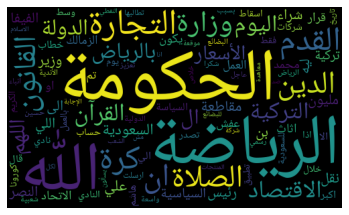

In [22]:
text=df['text']

text = ' '.join([str(elem) for elem in text])
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(500)}

wordcloud = WordCloud(random_state=0, max_words=100,width=500, height=300,  background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

#Feature Engneering

In [23]:
df['combined_text'] = df['text']+" "+df['categorie']
df.drop(['text','categorie'], axis=1, inplace = True)
df.combined_text

0         ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©
1         ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...
3        Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...
5            ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ ÿßŸÑÿØŸäÿßŸÜÿ©
6        ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...
                               ...                        
29553     ŸÜÿµÿ±ÿßŸàŸäÿß  ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ±  ÿ™ÿµŸÑ ÿßŸÜ ÿ≠ÿ≥ÿßÿ® ŸÇŸÜÿßÿ™Ÿá...
29554    ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...
29555    ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸäÿ™Ÿá...
29556    ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...
29557    ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ  ÿπÿßŸÖŸá

In [24]:
df.drop(['Username','location','Timestamp','followers','label'], axis=1, inplace = True)
df

Unnamed: 0.1                                      combined_text
0              3276   ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©
1               879   ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...
3              6342  Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...
5              1037      ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ ÿßŸÑÿØŸäÿßŸÜÿ©
6              5910  ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...
...             ...                                                ...
29553          1380   ŸÜÿµÿ±ÿßŸàŸäÿß  ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ±  ÿ™ÿµŸÑ ÿßŸÜ ÿ≠ÿ≥ÿßÿ® ŸÇŸÜÿßÿ™Ÿá...
29554          1297  ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...
29555          1844  ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸäÿ™Ÿá...
29556          5389  ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...
29557          5307  ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ  ÿπÿßŸÖŸáÿß ÿßŸÑÿßŸàŸÑ    ŸÜŸÜÿ≥Ÿâ...

[14180 rows x 2 columns]

In [25]:
df.drop(['Unnamed: 0.1'], axis=1, inplace = True)
df

combined_text
0       ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©
1       ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...
3      Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...
5          ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ ÿßŸÑÿØŸäÿßŸÜÿ©
6      ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...
...                                                  ...
29553   ŸÜÿµÿ±ÿßŸàŸäÿß  ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ±  ÿ™ÿµŸÑ ÿßŸÜ ÿ≠ÿ≥ÿßÿ® ŸÇŸÜÿßÿ™Ÿá...
29554  ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...
29555  ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸäÿ™Ÿá...
29556  ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...
29557  ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ  ÿπÿßŸÖŸáÿß ÿßŸÑÿßŸàŸÑ    ŸÜŸÜÿ≥Ÿâ...

[14180 rows x 1 columns]

##CountVectorization

In [26]:
vectorizer= CountVectorizer()
CV = vectorizer.fit_transform(df['combined_text'])
CV.shape

(14180, 33855)

In [27]:
data_cv = pd.DataFrame(CV.toarray(),columns = vectorizer.get_feature_names())
data_cv

ÿ°ÿßŸÖŸÜŸàÿß  ÿ°ŸÑŸÉ  ÿ¢ÿ¢ÿ¢Ÿá  ÿ¢ÿ®ÿßÿ§ŸÜÿß  ÿ¢ÿ®ÿ∑ÿßŸÑ  ÿ¢ÿ™ÿßŸá  ÿ¢ÿ´ÿßÿ±  ÿ¢ÿ≠ÿßÿØÿ¥ÿ±ŸÉ  ÿ¢ÿÆÿ±  ÿ¢ÿÆÿ±ÿ©  ...  \
0           0    0     0       0      0     0     0        0    0     0  ...   
1           0    0     0       0      0     0     0        0    0     0  ...   
2           0    0     0       0      0     0     0        0    0     0  ...   
3           0    0     0       0      0     0     0        0    0     0  ...   
4           0    0     0       0      0     0     0        0    0     0  ...   
...       ...  ...   ...     ...    ...   ...   ...      ...  ...   ...  ...   
14175       0    0     0       0      0     0     0        0    0     0  ...   
14176       0    0     0       0      0     0     0        0    0     0  ...   
14177       0    0     0       0      0     0     0        0    0     0  ...   
14178       0    0     0       0      0     0     0        0    0     0  ...   
14179       0    0     0       0      0     0     0        0    0     0  ...   

       ŸäŸàŸÜÿßŸäÿ™ÿØ  ŸäŸàŸÜÿ≥  ŸäŸàŸÜÿ∫ŸáŸàÿß  ŸäŸàŸÜÿ∫Ÿä  ŸäŸàŸáŸÖŸá  ŸäŸäÿ®ŸÑÿ∫ŸÜÿß  ŸäŸäÿ≤Ÿä  ŸäŸäÿ≥ÿ±  ŸäŸäÿ≥ÿ≥ÿ≥  \
0            0     0        0      0      0        0     0     0      0   
1            0     0        0      0      0        0     0     0      0   
2            0     0        0      0      0        0     0     0      0   
3            0     0        0      0      0        0     0     0      0   
4            0     0        0      0      0        0     0     0      0   
...        ...   ...      ...    ...    ...      ...   ...   ...    ...   
14175        0     0        0      0      0        0     0     0      0   
14176        0     0        0      0      0        0     0     0      0   
14177        0     0        0      0      0        0     0     0      0   
14178        0     0        0      0      0        0     0     0      0   
14179        0     0        0      0      0        0     0     0      0   

       ŸäŸäŸäŸäŸäÿß  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
14175       0  
14176       0  
14177       0  
14178       0  
14179       0  

[14180 rows x 33855 columns]

## CountVectorization Using (1, 2) Grams

In [28]:
# the numbers are not removed here
CV_grams = CountVectorizer(stop_words= stop_ls, ngram_range = (1,2))
CV_grams_ = CV_grams.fit_transform(df['combined_text'])
CV_grams_.shape

(14180, 102374)

In [29]:
# data_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names(),min_df = 3, max_df=0.90)
# data_grams

In [30]:
!free -mh

zsh:1: command not found: free


#TfidfVectorizer Using (1, 2) Grams

In [31]:
CV_TF_IDF = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['combined_text'])
CV_TF_IDF_.shape

(14180, 102374)

In [32]:
df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
df_tf

ÿ°ÿßŸÖŸÜŸàÿß  ÿ°ÿßŸÖŸÜŸàÿß Ÿàÿ±ÿ≥ŸàŸÑŸá  ÿ°ŸÑŸÉ  ÿ°ŸÑŸÉ ÿ™ÿπÿßŸÜŸä  ÿ¢ÿ¢ÿ¢Ÿá  ÿ¢ÿ¢ÿ¢Ÿá ŸÇÿ±ÿßÿ±ÿßÿ™  ÿ¢ÿ®ÿßÿ§ŸÜÿß  \
0         0.0            0.0  0.0        0.0   0.0          0.0     0.0   
1         0.0            0.0  0.0        0.0   0.0          0.0     0.0   
2         0.0            0.0  0.0        0.0   0.0          0.0     0.0   
3         0.0            0.0  0.0        0.0   0.0          0.0     0.0   
4         0.0            0.0  0.0        0.0   0.0          0.0     0.0   
...       ...            ...  ...        ...   ...          ...     ...   
14175     0.0            0.0  0.0        0.0   0.0          0.0     0.0   
14176     0.0            0.0  0.0        0.0   0.0          0.0     0.0   
14177     0.0            0.0  0.0        0.0   0.0          0.0     0.0   
14178     0.0            0.0  0.0        0.0   0.0          0.0     0.0   
14179     0.0            0.0  0.0        0.0   0.0          0.0     0.0   

       ÿ¢ÿ®ÿßÿ§ŸÜÿß Ÿàÿ£ŸÖŸáÿßÿ™ŸÜÿß  ÿ¢ÿ®ÿ∑ÿßŸÑ  ÿ¢ÿ®ÿ∑ÿßŸÑ ÿ£ÿ≥Ÿäÿß  ...  ŸäŸäÿ®ŸÑÿ∫ŸÜÿß ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ  \
0                  0.0    0.0         0.0  ...               0.0   
1                  0.0    0.0         0.0  ...               0.0   
2                  0.0    0.0         0.0  ...               0.0   
3                  0.0    0.0         0.0  ...               0.0   
4                  0.0    0.0         0.0  ...               0.0   
...                ...    ...         ...  ...               ...   
14175              0.0    0.0         0.0  ...               0.0   
14176              0.0    0.0         0.0  ...               0.0   
14177              0.0    0.0         0.0  ...               0.0   
14178              0.0    0.0         0.0  ...               0.0   
14179              0.0    0.0         0.0  ...               0.0   

       ŸäŸäÿ®ŸÑÿ∫ŸÜÿß ÿßŸÑŸÉŸÖ  ŸäŸäÿ≤Ÿä  ŸäŸäÿ≤Ÿä ŸÉŸàÿßŸÜÿ™ŸÖ  ŸäŸäÿ≥ÿ±  ŸäŸäÿ≥ÿ± ŸÅŸäŸÜÿ∏ÿ±  ŸäŸäÿ≥ÿ≥ÿ≥  \
0               0.0   0.0          0.0   0.0         0.0    0.0   
1               0.0   0.0          0.0   0.0         0.0    0.0   
2               0.0   0.0          0.0   0.0         0.0    0.0   
3               0.0   0.0          0.0   0.0         0.0    0.0   
4               0.0   0.0          0.0   0.0         0.0    0.0   
...             ...   ...          ...   ...         ...    ...   
14175           0.0   0.0          0.0   0.0         0.0    0.0   
14176           0.0   0.0          0.0   0.0         0.0    0.0   
14177           0.0   0.0          0.0   0.0         0.0    0.0   
14178           0.0   0.0          0.0   0.0         0.0    0.0   
14179           0.0   0.0          0.0   0.0         0.0    0.0   

       ŸäŸäÿ≥ÿ≥ÿ≥ ÿßÿ≥ÿ®ŸàÿπŸäŸÜ  ŸäŸäŸäŸäŸäÿß  ŸäŸäŸäŸäŸäÿß ÿ∂ÿ±ÿ®Ÿá  
0                0.0     0.0          0.0  
1                0.0     0.0          0.0  
2                0.0     0.0          0.0  
3                0.0     0.0          0.0  
4                0.0     0.0          0.0  
...              ...     ...          ...  
14175            0.0     0.0          0.0  
14176            0.0     0.0          0.0  
14177            0.0     0.0          0.0  
14178            0.0     0.0          0.0  
14179            0.0     0.0          0.0  

[14180 rows x 102374 columns]

#Topic modeling

In [33]:
def display_topic(model, feature_names, no_top_words, dialict=None):
    for ix, classfy in enumerate(model.components_):
        if not dialict or not dialict[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",dialict[ix],"'")
        print(", ".join([feature_names[i]
                        for i in classfy.argsort()[:-no_top_words - 1:-1]]))

#LSA

In [34]:
lsa_ = TruncatedSVD(4)
tw_classfy = lsa_.fit_transform(CV)
# the percentage of variance that is attributed by each of the selected components/topics
lsa_.explained_variance_ratio_

array([0.02472779, 0.0261104 , 0.0184583 , 0.0171417 ])

In [35]:
display_topic(lsa_, vectorizer.get_feature_names(),30)


Topic  0
ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©, ÿßŸÑŸÇÿØŸÖ, ŸÉÿ±ÿ©, Ÿàÿ≤ÿßÿ±ÿ©, ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ÿßŸÑŸÅŸäŸÅÿß, ÿßŸÜ, ÿßŸÑÿ≤ŸÖÿßŸÑŸÉ, ÿßŸÑÿ≥Ÿäÿßÿ≥ÿ©, ÿßŸÑÿπŸÖŸÑ, ÿßŸÑÿ£ŸÜÿØŸäÿ©, ŸÖŸÑŸäŸàŸÜ, ÿßŸÑŸÜÿµÿ±, ÿßŸÑŸÜÿßÿØŸä, ÿ≠ÿ≥ÿßÿ®, Ÿàÿ≤Ÿäÿ±, ÿ¥ŸÉÿ±ÿß, ÿßŸÑÿßÿ™ÿ≠ÿßÿØ, ÿπŸÑŸä, ÿßŸÑŸÑŸá, ÿ±ÿ¶Ÿäÿ≥, ÿßŸÑŸä, ŸÜÿßÿØŸä, ÿ±Ÿäÿßÿ∂ÿ©, ÿßŸÑÿßŸáŸÑŸä, ŸäŸÉŸàŸÜ, ÿßŸÑÿ®Ÿäÿ™, ŸàŸÅŸÇÿß, ÿ≠ÿ≥ŸäŸÜ, ÿÆŸÑÿßŸÑ

Topic  1
ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©, ÿßŸÑÿØŸàŸÑÿ©, ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂, ŸÖŸÇÿßÿ∑ÿπÿ©, ŸÑŸäŸá, ŸÜŸÇŸÑ, ÿ¥ÿ±ÿßÿ°, ÿ™ÿ±ŸÉŸäÿ©, ÿßŸÑŸäŸàŸÖ, ÿπŸÅÿ¥, ÿÆÿ∑ÿßÿ®, ÿßÿ´ÿßÿ´, ÿ¥ÿ±ŸÉÿßÿ™, ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ, ÿßŸÑÿ≥Ÿäÿßÿ≥ÿ©, ŸÇÿ±ÿßÿ±, ÿßŸÑÿØŸàŸÑŸäÿ©, ÿßŸÑÿ£ÿ≥ÿπÿßÿ±, ÿßŸÉÿ®ÿ±, ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ©, ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©, ÿ±ÿ≥ŸÖŸä, ŸÖŸàŸÇÿπÿ©, ŸÖÿπÿßŸáÿØÿ©, ÿÆŸÑÿßÿµ, Ÿäÿ≥ÿ£ŸÑŸàŸÜ, ÿßÿ±ÿ≥ŸÑÿ™, ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß

Topic  2
ÿßŸÑÿ≥Ÿäÿßÿ≥ÿ©, ÿßŸÑÿ≠ŸÉŸàŸÖÿ©, ÿßŸÑŸÇÿßŸÜŸàŸÜ, ÿßŸÑÿØŸäÿßŸÜÿ©, ÿßŸÜ, Ÿáÿßÿ¥ŸÖ, ÿßŸÑÿ≥Ÿäÿßÿ≥Ÿäÿ©, ÿßŸÑ, ÿßŸÑŸÑŸá, ÿ™ÿ∑ÿ®ŸäŸÇ, ÿßŸÑŸÜŸÅÿ∑Ÿä, ŸÑŸÉŸÑ, ÿßŸÑŸäŸàŸÖ, ÿßŸÑÿØŸäŸÜ, ÿ≥ÿπŸàÿØŸä, ÿßŸÑŸàÿ∑ŸÜŸä, ŸÖŸàÿßÿ∑ŸÜ, ÿπÿßÿ¨ŸÑ, ÿ®ŸÖŸÜÿß

LSA and TfidfVectorizer

In [36]:
lsa = TruncatedSVD(n_components=4, random_state=None)
lsa.fit(CV_TF_IDF_)

TruncatedSVD(n_components=4)

In [37]:
display_topic(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=50)


Topic  0
ŸÖŸÇÿßÿ∑ÿπÿ©, ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ÿßŸÑÿØŸàŸÑÿ©, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©, ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ© ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß, ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß, ÿ™ÿ±ŸÉŸäÿ© ÿßÿ±ÿ≥ŸÑÿ™, ÿÆÿ∑ÿßÿ® ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ©, ÿßÿ±ÿ≥ŸÑÿ™ ÿÆÿ∑ÿßÿ®, ÿßÿ±ÿ≥ŸÑÿ™, ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß ÿ®ÿßŸÑÿπŸÖŸÑ, ÿ¥ÿ±ŸÉÿßÿ™ ÿ™ÿ±ŸÉŸäÿ©, ÿ®ÿßŸÑÿπŸÖŸÑ, ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ©, ÿ¥ÿπÿ®Ÿäÿ© Ÿàÿßÿ≥ÿπÿ©, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ© ÿßŸÜÿ®ÿßÿ°, ÿßŸÜÿ®ÿßÿ° ŸÖŸÇÿßÿ∑ÿπÿ©, ÿ™ÿπÿ≤Ÿäÿ≤ ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©, ŸÖŸÇÿßÿ∑ÿπÿ© ÿ¥ÿπÿ®Ÿäÿ©, ÿ®ÿßŸÑÿπŸÖŸÑ ÿ™ÿπÿ≤Ÿäÿ≤, Ÿàÿßÿ≥ÿπÿ© ŸÑŸÑÿ®ÿ∂ÿßÿ¶ÿπ, ŸÑŸÑÿ®ÿ∂ÿßÿ¶ÿπ, ŸÑŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ÿ¥ÿπÿ®Ÿäÿ©, ÿ™ÿ±ŸÉŸäÿ©, ÿ¥ÿ±ŸÉÿßÿ™, Ÿàÿßÿ≥ÿπÿ©, ÿßŸÜÿ®ÿßÿ°, ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ÿ™ÿπÿ≤Ÿäÿ≤, ÿÆÿ∑ÿßÿ®, ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ÿßŸÑÿØŸàŸÑÿ©, ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ, Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÖŸÇÿßÿ∑ÿπÿ©, ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ÿßŸÑÿØŸàŸÑÿ©, ÿßŸÑÿØŸàŸÑÿ© ÿ™ÿµÿØÿ±, ÿßŸÑÿØŸàŸÑÿ© ŸÖŸàŸÇÿπÿ©, ÿßŸÑÿØŸàŸÑŸäÿ© ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ÿ±ÿ≥ŸÖŸä ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©, ŸÖÿπÿßŸáÿØÿ© ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©, ŸÖŸàŸÇÿπÿ© ŸÖÿπÿßŸáÿØÿ©, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ© ÿßŸÑÿØŸàŸÑŸäÿ©, ŸÇÿ±ÿßÿ± ÿ±ÿ≥ŸÖŸä, 

#NMF

In [38]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV)

NMF(n_components=4)

In [39]:
display_topic(model=NMF_model, feature_names=vectorizer.get_feature_names(), no_top_words=30)


Topic  0
ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©, ÿßŸÑŸÇÿØŸÖ, ŸÉÿ±ÿ©, Ÿàÿ≤ÿßÿ±ÿ©, ÿßŸÑŸÅŸäŸÅÿß, ÿßŸÑÿ≤ŸÖÿßŸÑŸÉ, ÿßŸÑÿ£ŸÜÿØŸäÿ©, ÿßŸÑÿπŸÖŸÑ, ŸÖŸÑŸäŸàŸÜ, ÿßŸÑŸÜÿµÿ±, ÿßŸÑŸÜÿßÿØŸä, ÿ≠ÿ≥ÿßÿ®, ÿßŸÜ, Ÿàÿ≤Ÿäÿ±, ÿ¥ŸÉÿ±ÿß, ÿßŸÑÿßÿ™ÿ≠ÿßÿØ, ŸÜÿßÿØŸä, ÿßŸÑŸä, ÿ±Ÿäÿßÿ∂ÿ©, ÿ±ÿ¶Ÿäÿ≥, ÿßŸÑÿßŸáŸÑŸä, ÿπŸÑŸä, ÿßŸÑÿ®Ÿäÿ™, ŸäŸÉŸàŸÜ, ŸàŸÅŸÇÿß, ÿ≠ÿ≥ŸäŸÜ, ÿßŸÑÿØŸàÿ±Ÿä, ŸäŸÖÿßÿ±ÿ≥, Ÿäÿ™ÿßÿ®ÿπ, ŸÜÿµŸäÿ≠ÿ©

Topic  1
ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©, ÿßŸÑÿØŸàŸÑÿ©, ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂, ŸÑŸäŸá, ŸÖŸÇÿßÿ∑ÿπÿ©, ŸÜŸÇŸÑ, ÿ¥ÿ±ÿßÿ°, ÿ™ÿ±ŸÉŸäÿ©, ÿßŸÑŸäŸàŸÖ, ÿπŸÅÿ¥, ÿßÿ´ÿßÿ´, ÿÆÿ∑ÿßÿ®, ŸÇÿ±ÿßÿ±, ÿ¥ÿ±ŸÉÿßÿ™, ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ, ÿßŸÑÿØŸàŸÑŸäÿ©, ÿ™ÿµÿØÿ±, ÿßŸÑÿ£ÿ≥ÿπÿßÿ±, ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©, ÿßŸÉÿ®ÿ±, ÿ±ÿ≥ŸÖŸä, ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ©, ŸÖŸàŸÇÿπÿ©, ŸÖÿπÿßŸáÿØÿ©, ÿÆŸÑÿßÿµ, Ÿäÿ≥ÿ£ŸÑŸàŸÜ, ÿßÿ±ÿ≥ŸÑÿ™, ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß

Topic  2
ÿßŸÑÿ≥Ÿäÿßÿ≥ÿ©, ÿßŸÑÿ≠ŸÉŸàŸÖÿ©, ÿßŸÑŸÇÿßŸÜŸàŸÜ, ÿßŸÜ, Ÿáÿßÿ¥ŸÖ, ÿßŸÑÿ≥Ÿäÿßÿ≥Ÿäÿ©, ÿßŸÑ, ÿ™ÿ∑ÿ®ŸäŸÇ, ÿßŸÑŸÜŸÅÿ∑Ÿä, ÿßŸÑŸäŸàŸÖ, ŸÑŸÉŸÑ, ÿ≥ÿπŸàÿØŸä, ÿßŸÑŸàÿ∑ŸÜŸä, ÿπÿßÿ¨ŸÑ, ŸÖŸàÿßÿ∑ŸÜ, ÿ®ŸÖŸÜÿßÿ≥ÿ®ÿ©, ÿ±ÿ¶Ÿäÿ≥, ÿ™ÿµÿ±ŸÅ, ÿßŸÑŸÖÿ≥ÿßÿπÿØÿ©, ÿß

#NMF and TfidfVectorizer

In [40]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV_TF_IDF_)

NMF(n_components=4)

In [41]:
display_topic(model=NMF_model, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=30)


Topic  0
ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ© ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß, ÿ™ÿ±ŸÉŸäÿ© ÿßÿ±ÿ≥ŸÑÿ™, ÿßÿ±ÿ≥ŸÑÿ™ ÿÆÿ∑ÿßÿ®, ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß, ÿÆÿ∑ÿßÿ® ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ©, ÿßÿ±ÿ≥ŸÑÿ™, ÿ™ÿ∑ÿßŸÑÿ®Ÿáÿß ÿ®ÿßŸÑÿπŸÖŸÑ, ÿ¥ÿ±ŸÉÿßÿ™ ÿ™ÿ±ŸÉŸäÿ©, ÿ®ÿßŸÑÿπŸÖŸÑ, ŸÑŸÑÿ≥ÿπŸàÿØŸäÿ©, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ© ÿßŸÜÿ®ÿßÿ°, ÿßŸÜÿ®ÿßÿ° ŸÖŸÇÿßÿ∑ÿπÿ©, ÿ™ÿπÿ≤Ÿäÿ≤ ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©, Ÿàÿßÿ≥ÿπÿ© ŸÑŸÑÿ®ÿ∂ÿßÿ¶ÿπ, ÿ¥ÿπÿ®Ÿäÿ© Ÿàÿßÿ≥ÿπÿ©, ÿ®ÿßŸÑÿπŸÖŸÑ ÿ™ÿπÿ≤Ÿäÿ≤, ŸÖŸÇÿßÿ∑ÿπÿ© ÿ¥ÿπÿ®Ÿäÿ©, ÿ¥ÿ±ŸÉÿßÿ™, ŸÑŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ŸÑŸÑÿ®ÿ∂ÿßÿ¶ÿπ, ÿ¥ÿπÿ®Ÿäÿ©, Ÿàÿßÿ≥ÿπÿ©, ÿßŸÜÿ®ÿßÿ°, ÿ™ÿπÿ≤Ÿäÿ≤, ÿÆÿ∑ÿßÿ®, ÿ™ÿ±ŸÉŸäÿ©, ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ŸÖŸÇÿßÿ∑ÿπÿ©, ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©

Topic  1
ÿßŸÑÿØŸàŸÑÿ©, ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ©, ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ© ÿßŸÑÿØŸàŸÑÿ©, ÿßŸÑÿØŸàŸÑÿ© ÿ™ÿµÿØÿ±, ÿßŸÑÿØŸàŸÑÿ© ŸÖŸàŸÇÿπÿ©, ÿ±ÿ≥ŸÖŸä ÿßŸÑÿ•ÿ¨ÿßÿ®ÿ©, ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ÿßŸÑÿØŸàŸÑÿ©, Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÖŸÇÿßÿ∑ÿπÿ©, ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ, ÿßŸÑÿØŸàŸÑŸäÿ© ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ, ŸÖŸàŸÇÿπÿ© ŸÖÿπÿßŸáÿØÿ©, ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ© ÿßŸÑÿØŸàŸÑŸäÿ©, ŸÖÿπÿßŸáÿØÿ© ÿßŸÑÿ™ÿ¨ÿßÿ±ÿ©, ŸÇÿ±ÿßÿ± ÿ±ÿ≥ŸÖŸä, Ÿäÿ≥ÿ£ŸÑŸ

#Lable Tweet

In [42]:
topic_results = lsa.transform(CV_TF_IDF_)

df['topics'] = topic_results.argmax(axis=1)

In [43]:
data_lable = df.reset_index()

In [44]:
data_lable

index                                      combined_text  topics
0          0   ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©       2
1          1   ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...       2
2          3  Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...       1
3          5      ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ ÿßŸÑÿØŸäÿßŸÜÿ©       3
4          6  ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...       2
...      ...                                                ...     ...
14175  29553   ŸÜÿµÿ±ÿßŸàŸäÿß  ÿ™ŸáŸÖŸÜŸä ŸÇÿ∂ÿßŸäÿß ÿßŸÑŸÜÿµÿ±  ÿ™ÿµŸÑ ÿßŸÜ ÿ≠ÿ≥ÿßÿ® ŸÇŸÜÿßÿ™Ÿá...       2
14176  29554  ÿ¥ÿ±ŸÉÿ© ÿßŸÑÿµŸÅÿ±ÿßÿ™ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÜŸÇŸÑ ÿπŸÅÿ¥ ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿ®ÿ£ŸÇŸÑ ÿßŸÑÿ£...       0
14177  29555  ÿπŸÜÿØŸÖÿß Ÿäÿ™ÿ≠ÿØÿ´ ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ∫ÿ±ŸÅ ÿßŸÑÿ™ÿ¨ÿßÿ±Ÿäÿ©  ŸàÿßŸÇÿπ ŸÖÿ≥ÿ§ŸàŸÑŸäÿ™Ÿá...       2
14178  29556  ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿßŸáŸÑŸä Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿ±Ÿäÿßÿ∂ÿ© ÿÆŸÑÿßŸÑ ÿπÿØÿ© ÿ£ÿ¥Ÿáÿ±...       2
14179  29557  ÿßÿπÿ∑Ÿä ŸÑÿßÿØÿßÿ±ÿ© ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖŸÑŸäŸàŸÜ  ÿπÿßŸÖŸáÿß ÿßŸÑÿßŸàŸÑ    ŸÜŸÜÿ≥Ÿâ...       2

[14180 rows x 3 columns]

In [45]:
conditions = [data_lable['topics'] == 0, data_lable['topics'] == 1 ,data_lable['topics'] == 2, data_lable['topics'] == 3]

In [46]:
lable =["ÿ≥Ÿäÿßÿ≥ÿ©","ÿßŸÇÿ™ÿµÿßÿØ","ÿ±Ÿäÿßÿ∂ÿ©","ÿØŸäŸÜ"]

In [47]:
data_lable['Classification'] = np.select(conditions, lable,default = np.nan)

In [48]:
data_lable.head(15)

index                                      combined_text  topics  \
0       0   ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©       2   
1       1   ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...       2   
2       3  Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...       1   
3       5      ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ ÿßŸÑÿØŸäÿßŸÜÿ©       3   
4       6  ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...       2   
5      11  ÿπÿ±ŸÅŸÜÿß ŸÑŸäÿ¥ ÿßŸÑŸÜÿµÿ± ŸäŸàŸÇÿπ  ÿßŸÑŸÑÿßÿπÿ®ŸäŸÜ ÿ®ŸÖÿ®ÿßŸÑÿ∫ ŸÉÿ®Ÿäÿ±Ÿá ŸàŸÖ...       2   
6      12                         ŸÜÿßÿØÿßŸÑ ŸÑÿßÿπÿ®Ÿä ÿßŸÑŸÖŸÅÿ∂ŸÑ ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©       2   
7      13   ÿ®ÿ∑ŸàŸÑÿßÿ™ŸÉŸÖ ŸÉÿßŸÜÿ™  ŸàŸÇÿ™ ŸÇÿØŸäŸÖ ÿ¨ÿØÿß ŸÉÿßŸÜÿ™ ŸÉÿ±ÿ© ÿßŸÑŸÇÿØŸÖ ÿ®ÿØ...       2   
8      17  ÿßŸÑŸÅÿßÿ¶ÿ≤ŸàŸÜ ÿ®ÿ¨ÿßÿ¶ÿ≤ÿ© ŸÜŸàÿ®ŸÑ  ÿßŸÑÿßŸÇÿ™ÿµÿßÿØ ÿ®ŸàŸÑ ŸÖŸäŸÑÿ¨ÿ±ŸàŸÖ Ÿàÿ±Ÿà...       0   
9      19   ŸäŸàŸÖ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿ£ŸÜŸä ÿ™ÿ£ÿÆÿ±ÿ™  ÿµŸÑÿßÿ© ÿßŸÑÿ∏Ÿáÿ± ŸàŸÉŸÜÿß   ÿ¨ŸÖÿß...       3   
10     20  ŸäŸÑŸÑÿß ŸÜŸÑÿπÿ® ÿ®ŸÖŸÜÿßÿ≥ÿ®ÿ© ÿßŸÑÿ•ŸÜÿ™ÿÆÿßÿ®ÿßÿ™ ÿßŸÑÿ™ŸàŸäÿ™ÿ±Ÿäÿ© ŸáÿπŸÖŸÑ ÿ•ŸÜ...       2   
11     21  ÿ≠ŸÑŸà ŸÖŸàÿ∂Ÿàÿπ ÿßŸÑŸÅŸäŸÅÿß ÿØŸá  ÿ≠ŸäŸÑÿ∫Ÿâ ÿßŸÑŸÇÿ±ÿßÿ±  ŸÖÿ≠ÿØÿ¥ ŸäŸÇÿØÿ± Ÿä...       2   
12     24  ŸÖÿÆÿ±ÿ¨ÿßÿ™ ŸÉŸÑŸäŸá ÿßŸÑÿ¥ÿ±ÿ∑Ÿá ŸàŸäŸÜŸáÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑŸÇÿßŸÜŸàŸÜ ŸàÿßŸÑÿ≠ÿ≤ŸÖ ...       3   
13     27  ÿπÿßÿ¨ŸÑ ÿ®ŸÖŸÜÿßÿ≥ÿ®ÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿ∑ŸÜŸä ÿßŸÑ ÿ®ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿ≠ŸÉŸàŸÖÿ© ...       0   
14     31  ŸäŸàŸÖ ÿßŸÑÿπŸÑŸÖ ŸäÿÆŸÑÿØ ÿ∞ŸÉÿ±Ÿâ ÿ®ÿ∑ŸÑ ÿµŸàŸÖÿßŸÑŸä ŸÖÿßÿ™ÿ™ ÿßŸÖŸá  ÿ∑ŸÅŸàŸÑÿ™...       3   

   Classification  
0           ÿ±Ÿäÿßÿ∂ÿ©  
1           ÿ±Ÿäÿßÿ∂ÿ©  
2          ÿßŸÇÿ™ÿµÿßÿØ  
3             ÿØŸäŸÜ  
4           ÿ±Ÿäÿßÿ∂ÿ©  
5           ÿ±Ÿäÿßÿ∂ÿ©  
6           ÿ±Ÿäÿßÿ∂ÿ©  
7           ÿ±Ÿäÿßÿ∂ÿ©  
8           ÿ≥Ÿäÿßÿ≥ÿ©  
9             ÿØŸäŸÜ  
10          ÿ±Ÿäÿßÿ∂ÿ©  
11          ÿ±Ÿäÿßÿ∂ÿ©  
12            ÿØŸäŸÜ  
13          ÿ≥Ÿäÿßÿ≥ÿ©  
14            ÿØŸäŸÜ

In [49]:
topics=pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])])

In [50]:
topics = topics.reset_index()

In [51]:
topics.head(10)

index   Topic_0   Topic_1   Topic_2   Topic_3
0      0  0.000392  0.000138  0.018298  0.000828
1      1  0.000433  0.000319  0.021299  0.000740
2      2  0.632071  0.772560 -0.003355 -0.000428
3      3  0.000028  0.000062 -0.000004  0.015729
4      4  0.001469 -0.001030  0.048871 -0.009322
5      5  0.000265  0.000112  0.011020  0.000387
6      6  0.000329  0.000186  0.022835  0.000690
7      7  0.000534  0.000112  0.099378  0.001823
8      8  0.015486  0.002141  0.000073  0.000061
9      9  0.000028  0.000041  0.000170  0.009625

After we done analyse precentage of classification for each tweet we now need to assigns specefic classification for each tweet

In [52]:
classification = data_lable.merge(topics, on=df.combined_text, how='left')

In [53]:
classification.drop(['key_0', 'index_x','index_y'],axis='columns', inplace=True)

In [54]:
classification=classification.drop_duplicates(subset='combined_text')

In [55]:
classification=classification.rename(columns={'Topic_0': 'ÿ≥Ÿäÿßÿ≥ÿ©', 'Topic_1': 'ÿßŸÇÿ™ÿµÿßÿØ','Topic_2':'ÿ±Ÿäÿßÿ∂ÿ©','Topic_3':'ÿØŸäŸÜ'})

In [56]:
classification

combined_text  topics  \
0        ÿ®ÿ¥ÿ±Ÿâ ÿ≥ÿßÿ±ÿ© ŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿßŸÑŸÜÿßÿØŸä ÿßŸÑÿ£ŸáŸÑŸä ŸÑŸÑÿ™ŸÅÿßÿµŸäŸÑ ÿßŸÑÿ±Ÿäÿßÿ∂ÿ©       2   
1        ÿßÿ≠ÿ® ÿßŸÑÿ£ŸÜŸÖŸäÿßÿ™ ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿ© ŸäŸÉŸÅŸä ÿßŸÜŸä ÿßÿ™ÿßÿ®ÿπŸáÿß ÿπŸÑŸä ÿßÿ±...       2   
2       Ÿäÿ≥ÿ£ŸÑŸàŸÜ ŸÑŸäŸá ŸÖŸÇÿßÿ∑ÿπÿ© ÿßŸÑÿ®ÿ∂ÿßÿ¶ÿπ ÿßŸÑÿ™ÿ±ŸÉŸäÿ© ŸÑŸäŸá ÿßŸÑÿØŸàŸÑÿ©  ...       1   
196         ŸÅÿ¶ÿ© ÿ¥ŸäŸàÿÆ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸä ÿßŸÑŸÑŸá ŸäŸÉÿ´ÿ±  ÿßŸÖÿ´ÿßŸÑŸáŸÖ ÿßŸÑÿØŸäÿßŸÜÿ©       3   
197     ŸÖŸÑŸäŸàŸÜ  ÿßŸÑŸÅ  ŸÖÿ¨ŸÖŸàÿπ ÿßŸÑŸÖÿ®ÿßŸÑÿ∫ ÿßŸÑŸÑŸä ÿ™ŸÖ ÿßŸÑÿßÿπŸÑÿßŸÜ  ÿ™ÿ®ÿ±...       2   
...                                                   ...     ...   
241049  ŸÉŸàÿ±Ÿäÿß   Ÿäÿ±Ÿàÿ≠ŸàŸÜ ÿ®ÿßŸÜŸÇÿ™ÿßŸÜ ÿßŸÑÿ¨Ÿäÿ¥ ÿ±ÿßÿßÿßÿ≠ ÿßŸÑŸÖÿ≠ÿ™ŸàŸâ  ÿßŸÑ...       0   
241058  ÿßŸÑÿ£ÿπŸÑÿßŸÜÿßÿ™ ŸÉŸàŸÑŸäŸÜÿß ÿπŸÜÿØŸÖÿß ŸàÿµŸÑ  ÿ™ŸÇÿßÿπÿØ ÿßŸÑÿ≠ŸÉÿßŸÖ ÿßŸÑÿßÿ¨ÿ®...       2   
241063   ÿßÿ®ŸÑÿ∫ÿ™ ÿßŸÑÿ≠ŸÉŸàŸÖÿ© ÿßŸÑŸÖÿ¨ŸÑÿ≥ ÿ®ŸÖŸàÿßŸÅŸÇÿ™Ÿáÿß  ÿØÿ±ÿßÿ≥ÿ© ÿ™ŸÖÿØŸäÿØ ÿ™...       0   
241272                      ÿßŸÑÿØŸäŸÜ ŸÉÿßŸÖŸÑ ÿßŸÑŸÜŸÇÿµ ŸÅŸäŸÜÿß ÿßŸÑÿØŸäÿßŸÜÿ©       3   
241370   ÿ®ÿßÿπ ÿßŸÑŸÖÿ≠ÿ™ŸÑ ÿßŸÑÿπÿ´ŸÖÿßŸÜŸä ÿßŸÑÿßÿ±ÿßÿ∂Ÿä ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑŸÅŸÑÿ≥ÿ∑ŸäŸÜŸä...       3   

       Classification     ÿ≥Ÿäÿßÿ≥ÿ©    ÿßŸÇÿ™ÿµÿßÿØ     ÿ±Ÿäÿßÿ∂ÿ©       ÿØŸäŸÜ  
0               ÿ±Ÿäÿßÿ∂ÿ©  0.000392  0.000138  0.018298  0.000828  
1               ÿ±Ÿäÿßÿ∂ÿ©  0.000433  0.000319  0.021299  0.000740  
2              ÿßŸÇÿ™ÿµÿßÿØ  0.632071  0.772560 -0.003355 -0.000428  
196               ÿØŸäŸÜ  0.000028  0.000062 -0.000004  0.015729  
197             ÿ±Ÿäÿßÿ∂ÿ©  0.001469 -0.001030  0.048871 -0.009322  
...               ...       ...       ...       ...       ...  
241049          ÿ≥Ÿäÿßÿ≥ÿ©  0.023806  0.003337  0.000063  0.000077  
241058          ÿ±Ÿäÿßÿ∂ÿ©  0.000276  0.000126  0.001741  0.000563  
241063          ÿ≥Ÿäÿßÿ≥ÿ©  0.000678 -0.000038  0.000302  0.000241  
241272            ÿØŸäŸÜ  0.000048  0.000121 -0.000060  0.030481  
241370            ÿØŸäŸÜ  0.000117  0.000059  0.000839  0.009697  

[7801 rows x 7 columns]

#EDA

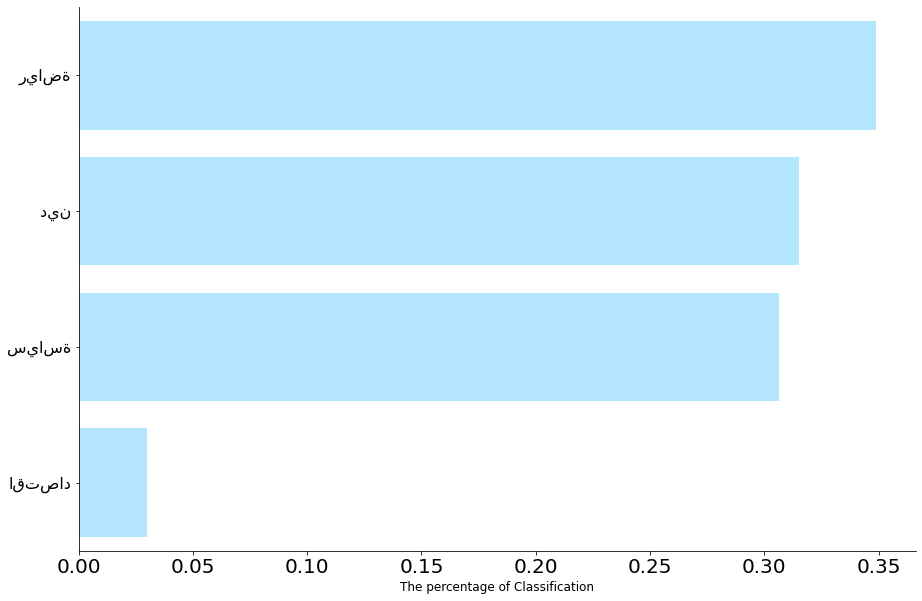

In [57]:
plt.figure(figsize=(15,10))
plt.yticks(fontsize=20, size=16) 
plt.xticks(fontsize=20) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=data_lable['Classification'].value_counts().index, 
            x=data_lable['Classification'].value_counts(normalize=True, ascending=False), 
            data=data_lable, orient='h', 
            color='#b3e5fc',saturation=1
           )
plt.xlabel('The percentage of Classification', fontsize=12)
#plt.ylabel(fontsize=12, **t_font)

sns.despine();

#Topics Word Clouds

100 most common words in Politic tweets

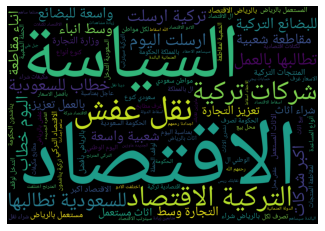

In [58]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='ÿ≥Ÿäÿßÿ≥ÿ©')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Economey tweets

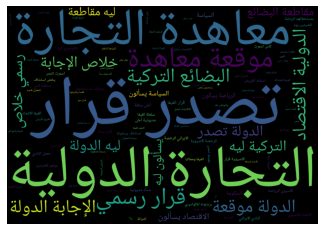

In [59]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='ÿßŸÇÿ™ÿµÿßÿØ')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Sport tweets

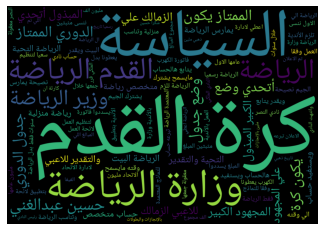

In [60]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='ÿ±Ÿäÿßÿ∂ÿ©')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Religion tweets

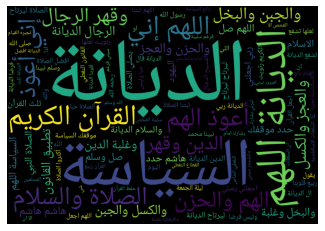

In [61]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='ÿØŸäŸÜ')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

#Prepare data for modeling

In [62]:
# Split the data into X and y data sets
X = classification.combined_text
y = classification.Classification

In [63]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams

cv1 = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

#Classification 

Logistic Regression model

In [65]:
# Create a logistic regression model to use
lr = LogisticRegression()

In [66]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [67]:
print(classification_report(y_test,y_pred_cv1))

              precision    recall  f1-score   support

      ÿßŸÇÿ™ÿµÿßÿØ       0.00      0.00      0.00        44
         ÿØŸäŸÜ       0.83      0.99      0.90       862
       ÿ±Ÿäÿßÿ∂ÿ©       0.97      0.80      0.88       759
       ÿ≥Ÿäÿßÿ≥ÿ©       0.92      0.93      0.93       676

    accuracy                           0.89      2341
   macro avg       0.68      0.68      0.68      2341
weighted avg       0.89      0.89      0.88      2341



In [68]:
print("Logistic Regression Accuracy=",accuracy_score(y_test, y_pred_cv1))
print("Logistic Regression F1 score=",f1_score(y_test, y_pred_cv1, average='micro'))

Logistic Regression Accuracy= 0.8923536950021358
Logistic Regression F1 score= 0.8923536950021358


Naive Bayes model

In [69]:
# Fit the first Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [70]:
print(classification_report(y_test,y_pred_cv1_nb))

              precision    recall  f1-score   support

      ÿßŸÇÿ™ÿµÿßÿØ       0.00      0.00      0.00        44
         ÿØŸäŸÜ       0.89      0.95      0.92       862
       ÿ±Ÿäÿßÿ∂ÿ©       0.92      0.85      0.88       759
       ÿ≥Ÿäÿßÿ≥ÿ©       0.87      0.92      0.89       676

    accuracy                           0.89      2341
   macro avg       0.67      0.68      0.67      2341
weighted avg       0.88      0.89      0.88      2341



In [71]:
print("Naive Bayes Accuracy=",accuracy_score(y_test,y_pred_cv1_nb))
print("Naive Bayes F1 score=",f1_score(y_test, y_pred_cv1_nb, average='micro'))

Naive Bayes Accuracy= 0.8923536950021358
Naive Bayes F1 score= 0.8923536950021358


SVM model

In [72]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(kernel='linear')
SVM.fit(X_train_cv1,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_cv1)

In [73]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

      ÿßŸÇÿ™ÿµÿßÿØ       0.86      0.68      0.76        44
         ÿØŸäŸÜ       0.84      0.98      0.91       862
       ÿ±Ÿäÿßÿ∂ÿ©       0.96      0.82      0.88       759
       ÿ≥Ÿäÿßÿ≥ÿ©       0.95      0.92      0.94       676

    accuracy                           0.91      2341
   macro avg       0.90      0.85      0.87      2341
weighted avg       0.91      0.91      0.91      2341



In [74]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy=",accuracy_score(predictions_SVM, y_test))
print("SVM F1 score=",f1_score(y_test,predictions_SVM, average='micro'))

SVM Accuracy= 0.9073045706962837
SVM F1 score= 0.9073045706962838


Saving the model

In [75]:
import pickle
pickle.dump(SVM, open('model.pkl', 'wb'))

In [76]:
pickle.dump(cv1, open("vectorizer.pickle", "wb"))